In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
sys.path.insert(0, '/Users/weilu/Research/opt_server/')
from pyCodeLib import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

/Users/weilu/anaconda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from datetime import datetime
plt.rcParams['figure.figsize'] = 0.5*np.array([16.18033, 10])    #golden ratio

In [5]:
from collections import defaultdict
def get_simulation_data(folder_list, month_dic, pdb_list, simulationType="membrane_protein_structure_prediction"):
    # pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
    # I removed 1rhz because the subunit is not stable.
    # pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
    # pdb_list = ["2bg9", "1j4n", "1py6_SD", "1iwg", "2ic8", "1pv6", "1kpl", "2bs2", "1py6", "1u19"]
    # remove 1kpl, 

    run_n = 20
    # folder_list = ["ha_frag_complete_opt_cutoff722",  "ha_frag", "ha_new_model15_all_prime"]
    # month_dic = {"ha_frag_complete_opt_cutoff722":"sep_2020", "ha_frag":"sep_2020", "ha_new_model15_all_prime":"oct_2020"}

    all_data = []

    for folder in folder_list:
        print(folder)
        month = month_dic[folder]
        for pdb in pdb_list:
            for i in range(run_n):
                    pre = f"/Users/weilu/Research/server/{month}/{simulationType}/{folder}/{pdb}/{i}"
                    info_file = "info.dat"
                    location = f"{pre}/{info_file}"
                    try:
                        tmp = pd.read_csv(location, sep="\s+")
                        tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                        all_data.append(tmp)
                    except:
                        print(pdb, i, folder, location)
                        pass
    data = pd.concat(all_data, sort=False)

    today = datetime.today().strftime('%m-%d')
    outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
    data.reset_index(drop=True).to_csv(outFile)
    print(outFile)

In [30]:
# pdb_list = ["5ncq"]
# pdb_list = ["5ncq", '1uaz', '5lwe', '6e9o', '5i6x', '3vvo', '4tph', '6m20', '6d32']
pdb_list = ['1uaz', '6d32', '5lwe', '6e9o', '5ncq', '3vvo', '4tph', '6m20', '5i6x']  # sorted by length

In [6]:
simulationType = "membrane_protein_target_set"
folder_list = ["run1_submode0", "run1_submode1"]
month_dic = defaultdict(lambda:"nov_2020")
get_simulation_data(folder_list, month_dic, pdb_list, simulationType)

run1_submode0
run1_submode1
/Users/weilu/Research/data/openMM/membrane_protein_target_set_run1_submode1_11-15.csv


In [8]:
new_target_set = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_target_set_run1_submode1_11-15.csv").reset_index(drop=True)

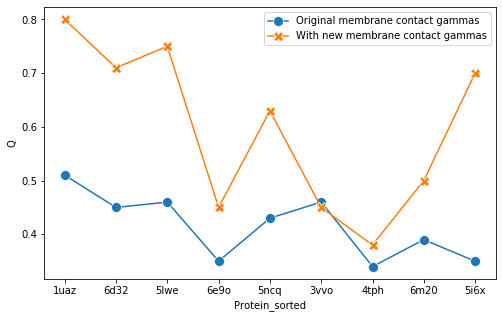

In [31]:
y = "Q"
# d = pd.concat([data, previous_data])
# d = pd.concat([data, mixed_iter2, iter1_v1])
d = pd.concat([new_target_set])
d = d.query("Folder != 'ff_new_model15_all_prime' and Folder != 'ha_frag_complete_opt_cutoff722' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
# max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_new_model15_all_prime', 'ha_frag', 'mixed_iter5',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
plt.legend(["Original membrane contact gammas ", "With new membrane contact gammas"])
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
# plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory", "Iterative 1"])

In [27]:
info = []
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()
pdb_list = ["5ncq", '1uaz', '5lwe', '6e9o', '5i6x', '3vvo', '4tph', '6m20', '6d32']
for pdb in pdb_list:
    name = pdb
    protein_length = getFromTerminal(f"wc /Users/weilu/Research/server/nov_2020/membrane_protein_target_set/setups/{pdb}/ssweight").split()[0]
    print(f"protein: {name}, length: {protein_length}")
    info.append([pdb, protein_length])
info = pd.DataFrame(info, columns=["Protein", "Length"])
info = info.sort_values("Length").reset_index(drop=True)
# info.to_csv("/Users/weilu/Research/server/nov_2020/membrane_protein_target_set/length_info.csv")

In [33]:
info.T

0     1     2     3     4     5     6     7     8
Protein  1uaz  6d32  5lwe  6e9o  5ncq  3vvo  4tph  6m20  5i6x
Length    236   274   275   393   400   448   454   476   544

In [10]:
max_Q_data

Unnamed: 0  Steps     Q     Rg  Backbone     Rama  Contact  Fragment  \
0        96554   1478  0.51  17.70    843.84 -1529.62  -408.61   -968.65   
1       507667   2263  0.80  18.48    581.00 -1578.38  -122.50  -1054.55   
2       266636   1424  0.46  21.24   1592.76 -3233.06  -766.39  -1952.59   
3       712783   2215  0.45  21.47   1109.13 -3325.22  -268.88  -1975.95   
4       329277   1515  0.34  21.05   1543.72 -3045.97  -877.76  -1839.98   
5       755089   1987  0.38  21.57   1290.82 -3094.34  -233.58  -1956.51   
6       217545   2373  0.35  23.08   1302.73 -3409.04 -1156.76  -2383.41   
7       657446   1922  0.70  23.25   1583.23 -3369.96  -326.17  -2491.52   
8       111137   1049  0.46  21.52   1197.63 -2087.66  -397.11  -1227.06   
9       554861   1919  0.75  20.99    861.95 -2173.08  -119.60  -1309.31   
10       44338   1804  0.43  22.75   1236.62 -2600.63  -714.95  -1684.90   
11      474835   1957  0.63  21.69   1099.08 -2596.50  -239.96  -1803.80   
12      416697   1365  0.45  19.45    969.83 -1851.47  -487.42  -1127.62   
13      870304   2110  0.71  19.36    727.42 -1923.85  -145.74  -1198.88   
14      151321   1201  0.35  20.63   1579.59 -2546.60  -708.03  -1549.29   
15      602721   2241  0.45  20.67    938.72 -2677.53  -226.29  -1681.52   
16      367337   2045  0.39  22.54   1287.59 -3474.08 -1038.53  -2132.59   
17      837539   1871  0.50  22.90   1438.00 -3484.39  -279.00  -2174.23   

    Membrane   ER  TBM_Q  Beta  Pap  Helical    Total  Run Protein  \
0      69.43  0.0    0.0   0.0  0.0      0.0 -1993.61   18    1uaz   
1      66.05  0.0    0.0   0.0  0.0      0.0 -2108.38    2    1uaz   
2     132.04  0.0    0.0   0.0  0.0      0.0 -4227.24    6    3vvo   
3     119.37  0.0    0.0   0.0  0.0      0.0 -4341.54    4    3vvo   
4     127.01  0.0    0.0   0.0  0.0      0.0 -4092.97   11    4tph   
5     126.88  0.0    0.0   0.0  0.0      0.0 -3866.73    1    4tph   
6     158.11  0.0    0.0   0.0  0.0      0.0 -5488.37    6    5i6x   
7     134.70  0.0    0.0   0.0  0.0      0.0 -4469.72    2    5i6x   
8      67.81  0.0    0.0   0.0  0.0      0.0 -2446.38    4    5lwe   
9      69.64  0.0    0.0   0.0  0.0      0.0 -2670.39    1    5lwe   
10    100.73  0.0    0.0   0.0  0.0      0.0 -3663.13   17    5ncq   
11     91.88  0.0    0.0   0.0  0.0      0.0 -3449.30    9    5ncq   
12     87.12  0.0    0.0   0.0  0.0      0.0 -2409.56    6    6d32   
13     80.67  0.0    0.0   0.0  0.0      0.0 -2460.38    7    6d32   
14    105.97  0.0    0.0   0.0  0.0      0.0 -3118.35    0    6e9o   
15    100.25  0.0    0.0   0.0  0.0      0.0 -3546.37    0    6e9o   
16    104.10  0.0    0.0   0.0  0.0      0.0 -5253.51    6    6m20   
17    104.34  0.0    0.0   0.0  0.0      0.0 -4395.28   14    6m20   

           Folder Protein_sorted  
0   run1_submode0           1uaz  
1   run1_submode1           1uaz  
2   run1_submode0           3vvo  
3   run1_submode1           3vvo  
4   run1_submode0           4tph  
5   run1_submode1           4tph  
6   run1_submode0           5i6x  
7   run1_submode1           5i6x  
8   run1_submode0           5lwe  
9   run1_submode1           5lwe  
10  run1_submode0           5ncq  
11  run1_submode1           5ncq  
12  run1_submode0           6d32  
13  run1_submode1           6d32  
14  run1_submode0           6e9o  
15  run1_submode1           6e9o  
16  run1_submode0           6m20  
17  run1_submode1           6m20

In [3]:
pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]



In [5]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ha_new_model15_all_prime_10-14.csv")
data = data.reset_index(drop=True)

In [6]:

folder_list = ["mixed_iter5"]
month_dic = defaultdict(lambda:"nov_2020")
get_simulation_data(folder_list, month_dic)

mixed_iter5
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter5_11-09.csv


In [8]:
mixed_iter5 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter5_11-09.csv").reset_index(drop=True)

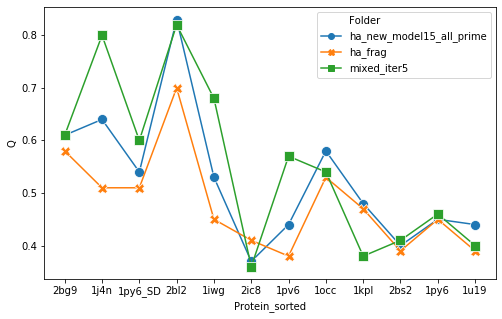

In [10]:
y = "Q"
# d = pd.concat([data, previous_data])
# d = pd.concat([data, mixed_iter2, iter1_v1])
d = pd.concat([data, mixed_iter5])
d = d.query("Folder != 'ff_new_model15_all_prime' and Folder != 'ha_frag_complete_opt_cutoff722' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_new_model15_all_prime', 'ha_frag', 'mixed_iter5',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
# plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory", "Iterative 1"])

In [8]:

folder_list = ["mixed_iter4"]
month_dic = defaultdict(lambda:"nov_2020")
get_simulation_data(folder_list, month_dic)

mixed_iter4
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter4_11-02.csv


In [9]:
mixed_iter4 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter4_11-02.csv").reset_index(drop=True)

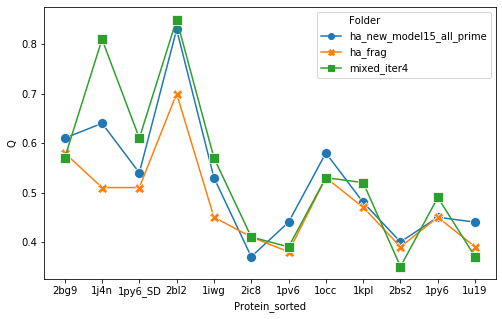

In [10]:
y = "Q"
# d = pd.concat([data, previous_data])
# d = pd.concat([data, mixed_iter2, iter1_v1])
d = pd.concat([data, mixed_iter4])
d = d.query("Folder != 'ff_new_model15_all_prime' and Folder != 'ha_frag_complete_opt_cutoff722' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_new_model15_all_prime', 'ha_frag', 'mixed_iter4',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
# plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory", "Iterative 1"])

In [123]:

folder_list = ["mixed_iter3"]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

mixed_iter3
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter3_10-31.csv


In [124]:
mixed_iter3 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter3_10-31.csv").reset_index(drop=True)

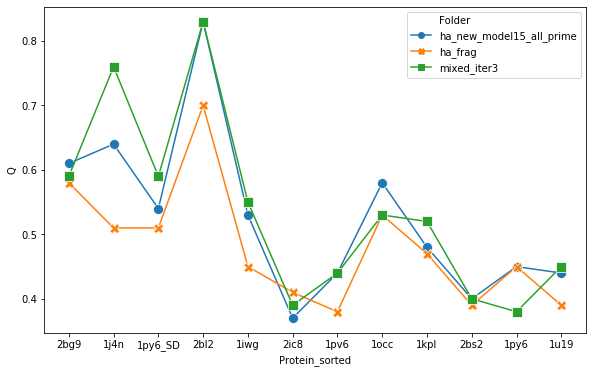

In [125]:
y = "Q"
# d = pd.concat([data, previous_data])
# d = pd.concat([data, mixed_iter2, iter1_v1])
d = pd.concat([data, mixed_iter3])
d = d.query("Folder != 'ff_new_model15_all_prime' and Folder != 'ha_frag_complete_opt_cutoff722' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_new_model15_all_prime', 'ha_frag', 'mixed_iter3',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
# plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory", "Iterative 1"])

In [105]:
folder_list = ["mixed_iter2"]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

mixed_iter2
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter2_10-27.csv


In [106]:
mixed_iter2 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter2_10-27.csv").reset_index(drop=True)

In [115]:
d["Folder"].unique()

array(['ha_frag', 'ha_new_model15_all_prime',
       'mixed_iter1_new_mode15_all_prime'], dtype=object)

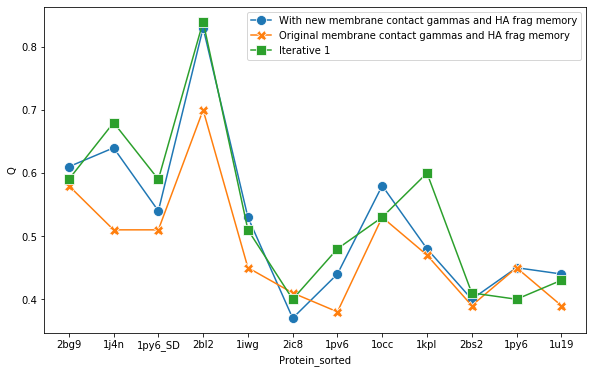

In [116]:
y = "Q"
# d = pd.concat([data, previous_data])
# d = pd.concat([data, mixed_iter2, iter1_v1])
d = pd.concat([data, iter1_v1])
d = d.query("Folder != 'ff_new_model15_all_prime' and Folder != 'ha_frag_complete_opt_cutoff722' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_new_model15_all_prime', 'ha_frag', 'mixed_iter1_new_mode15_all_prime',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory", "Iterative 1"])

In [99]:

folder_list = ["no_contact_HA"]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

no_contact_HA
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_no_contact_HA_10-27.csv


In [101]:
no_contact_HA = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_no_contact_HA_10-27.csv").reset_index(drop=True)

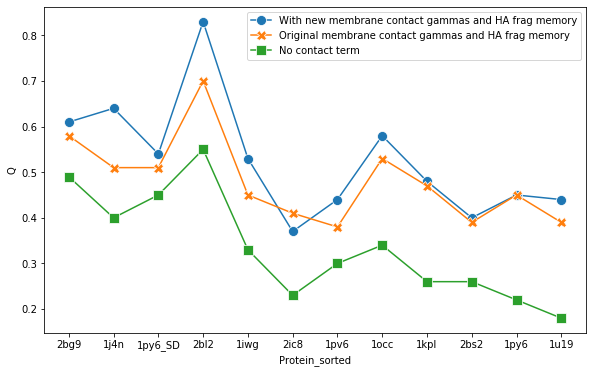

In [104]:
y = "Q"
# d = pd.concat([data, previous_data])
d = pd.concat([data, no_contact_HA])
d = d.query("Folder != 'ha_frag_complete_opt_cutoff722' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_new_model15_all_prime', 'ha_frag', 'no_contact_HA',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory", "No contact term"])

In [96]:

folder_list = ["no_msa_contact"]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

no_msa_contact
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_no_msa_contact_10-27.csv


In [97]:
no_msa_contact = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_no_msa_contact_10-27.csv").reset_index(drop=True)

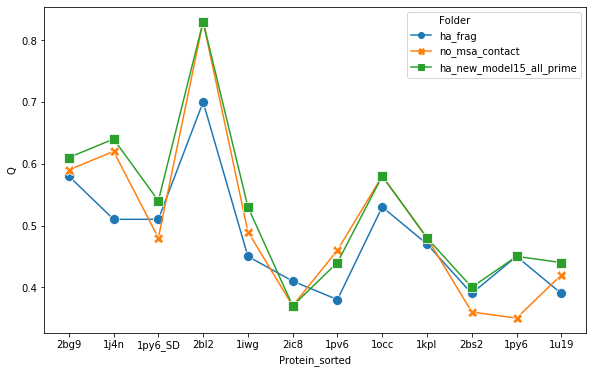

In [98]:
y = "Q"
# d = pd.concat([data, previous_data])
# d = data
d = pd.concat([data, no_msa_contact])

d = d.query("Folder != 'ha_frag_complete_opt_cutoff722'and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)

# plt.legend([ "New Contact and Four body term with HA frag memory", "New contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])

In [56]:

folder_list = ["ten_letter_contact"]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

ten_letter_contact
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ten_letter_contact_10-26.csv


In [57]:
ten_letter_contact = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ten_letter_contact_10-26.csv").reset_index(drop=True)

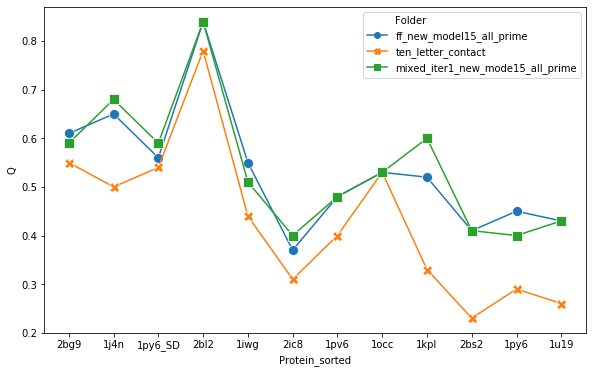

In [59]:

y = "Q"
d = pd.concat([ten_letter_contact, iter1_v1])
# d = data
d = d.query("Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)

# plt.legend([ "New Contact and Four body term with HA frag memory", "New contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])

In [41]:

folder_list = ["version2_mixed_iter1_new_mode15_all_prime"]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

version2_mixed_iter1_new_mode15_all_prime
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_version2_mixed_iter1_new_mode15_all_prime_10-25.csv


In [42]:
iter1_v2 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_version2_mixed_iter1_new_mode15_all_prime_10-25.csv").reset_index(drop=True)

In [44]:
iter1_v1 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter1_new_mode15_all_prime_10-20.csv").reset_index(drop=True)

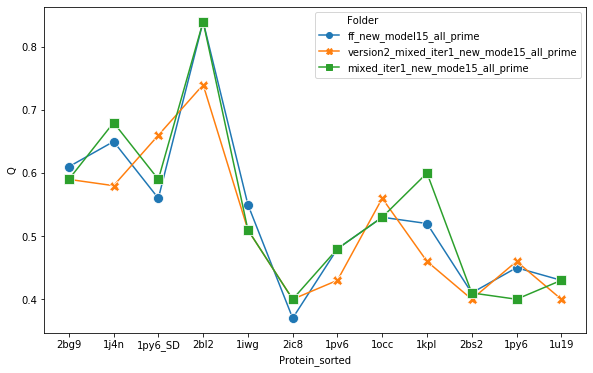

In [45]:

y = "Q"
d = pd.concat([iter1_v2, iter1_v1])
# d = data
d = d.query("Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)

# plt.legend([ "New Contact and Four body term with HA frag memory", "New contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])

In [33]:

folder_list = ["new_model15_all_prime_new_HA"]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

new_model15_all_prime_new_HA
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_new_model15_all_prime_new_HA_10-25.csv


In [34]:
mode15_new_ha = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_new_model15_all_prime_new_HA_10-25.csv").reset_index(drop=True)

In [35]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
mode15_ha = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ha_new_model15_all_prime_10-14.csv").reset_index(drop=True)


In [36]:
mode15_ha["Folder"].unique()

array(['ha_frag_complete_opt_cutoff722', 'ha_frag',
       'ha_new_model15_all_prime'], dtype=object)

In [38]:
mode15_ha = mode15_ha.query("Folder == 'ha_new_model15_all_prime'").reset_index(drop=True)

# new HA (using membrane protein FASTA only) doesn't help much.


In [40]:

y = "Q"
d = pd.concat([mode15_new_ha, mode15_ha])
# d = data
d = d.query("Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)

# plt.legend([ "New Contact and Four body term with HA frag memory", "New contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])

In [71]:

folder_list = ["ff_new_model15_all_prime", "mixed_iter1_new_mode15_all_prime"]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

ff_new_model15_all_prime
mixed_iter1_new_mode15_all_prime
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter1_new_mode15_all_prime_10-20.csv


In [83]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter1_new_mode15_all_prime_10-20.csv")
data = data.reset_index(drop=True)

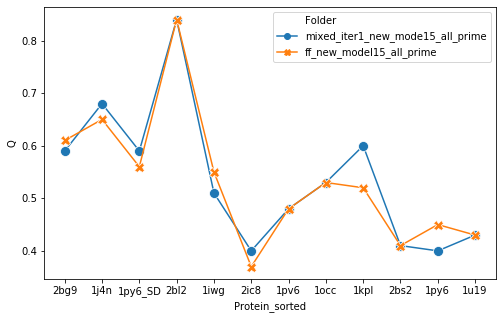

In [84]:
y = "Q"
# d = pd.concat([data, previous_data])
d = data
d = d.query("Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)

# plt.legend([ "New Contact and Four body term with HA frag memory", "New contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])

In [119]:

folder_list = ["mode20_decoy50_A5", ]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

mode20_decoy50_A5
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mode20_decoy50_A5_10-28.csv


In [120]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
mode20_decoy50_A5 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mode20_decoy50_A5_10-28.csv").reset_index(drop=True)



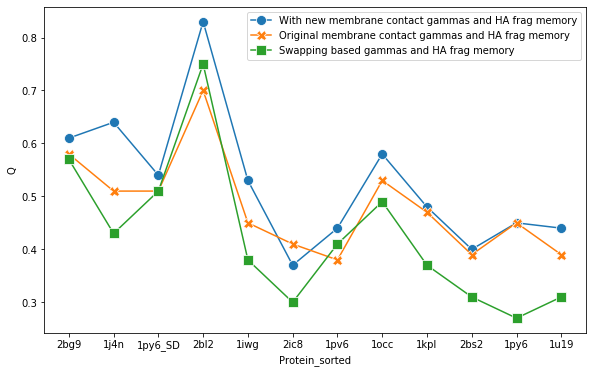

In [121]:
y = "Q"
# d = pd.concat([data, previous_data])
# d = data
d = pd.concat([data, mode20_decoy50_A5])

d = d.query("Folder != 'ha_frag_complete_opt_cutoff722'and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_new_model15_all_prime', 'ha_frag', 'mode20_decoy50_A5',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory", "Swapping based gammas and HA frag memory"])

In [63]:

folder_list = ["mode20_decoy50", ]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

mode20_decoy50
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mode20_decoy50_10-17.csv


In [67]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
mode20_decoy50 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mode20_decoy50_10-17.csv").reset_index(drop=True)


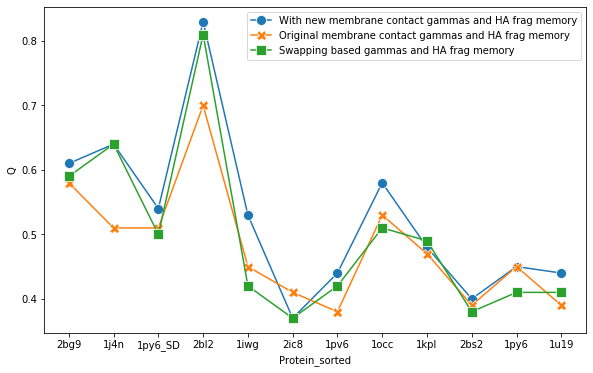

In [118]:
y = "Q"
# d = pd.concat([data, previous_data])
# d = data
d = pd.concat([data, mode20_decoy50])

d = d.query("Folder != 'ha_frag_complete_opt_cutoff722'and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_new_model15_all_prime', 'ha_frag', 'mode20_decoy50',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory", "Swapping based gammas and HA frag memory"])

In [ ]:
p3 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mixed_iter1_new_mode15_all_prime_10-20.csv").reset_index(drop=True)

In [59]:

folder_list = ["mode18", ]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

mode18
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mode18_10-16.csv


In [69]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
mode18 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_mode18_10-16.csv").reset_index(drop=True)

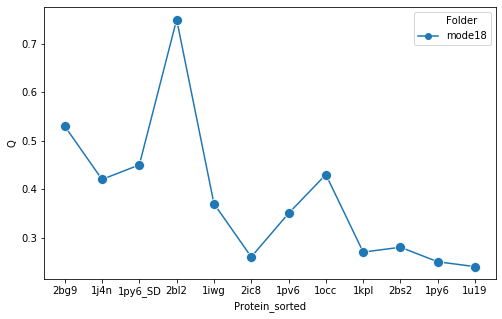

In [61]:
y = "Q"
# d = pd.concat([data, previous_data])
d = data
d = d.query("Folder != 'ha_frag_complete_opt_cutoff722' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "New contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
# plt.legend([ "New Contact and Four body term with HA frag memory", "New contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])

In [50]:
folder_list = ["complete_cutoff722_all_prime_oct14"]
month_dic = defaultdict(lambda:"oct_2020")
get_simulation_data(folder_list, month_dic)

complete_cutoff722_all_prime_oct14
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_complete_cutoff722_all_prime_oct14_10-15.csv


In [73]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
complete_cutoff722_all_prime_oct14 = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_complete_cutoff722_all_prime_oct14_10-15.csv").reset_index(drop=True)

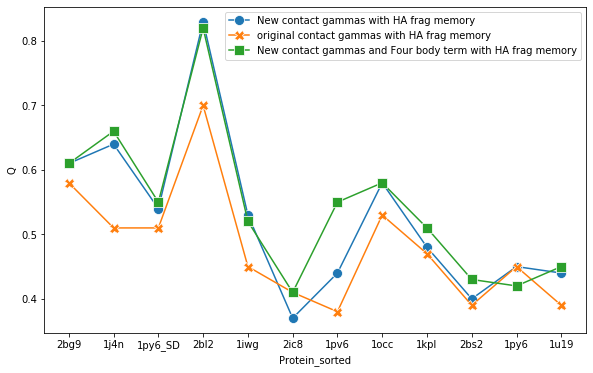

In [86]:
y = "Q"
# d = pd.concat([data, previous_data])
# d = data
# d = pd.concat([data, mode18, mode20_decoy50, complete_cutoff722_all_prime_oct14])
d = pd.concat([data, complete_cutoff722_all_prime_oct14])
d = d.query("Folder != 'ha_frag_complete_opt_cutoff722' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_new_model15_all_prime', 'ha_frag', 'complete_cutoff722_all_prime_oct14',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])


ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)

plt.legend([ "New contact gammas with HA frag memory", "original contact gammas with HA frag memory", "New contact gammas and Four body term with HA frag memory"])

In [36]:


pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
# I removed 1rhz because the subunit is not stable.

pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]

# pdb_list = ["2bg9", "1j4n", "1py6_SD", "1iwg", "2ic8", "1pv6", "1kpl", "2bs2", "1py6", "1u19"]

# remove 1kpl, 

simulationType = "membrane_protein_structure_prediction"
run_n = 20
# folder_list = ["run3_top50_v3", "run3_top50_v2", "run3_top50", "run3_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_with_contact", "run2_cbd"]
# folder_list = ["six_letter_300", "six_letter_1232", "standard_timeStep2", "standard"]
# folder_list = ["six_letter_weighted", "six_letter_1100_divide_3", "six_letter_limit_max_1", "six_letter_limit_max", "six_letter_1232_msa_c_0", "standard_timeStep2"]
folder_list = ["ha_frag", "he_frag", "new_contact_only_cutoff450", "new_contact_only_cutoff550", "ha_frag_new_contact_only_cutoff550"]
folder_list = [ "ha_frag_complete_opt_cutoff722", "ha_frag_new_contact_only_cutoff450", "ha_frag", "ha_frag_new_contact_only_cutoff550"]
folder_list = ["ha_frag_complete_opt_cutoff722",  "ha_frag", "ha_new_model15_all_prime"]



month_dic = {"ha_frag_complete_opt_cutoff722":"sep_2020", "ha_frag":"sep_2020", "ha_new_model15_all_prime":"oct_2020"}

all_data = []

for folder in folder_list:
    print(folder)
    month = month_dic[folder]
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/{month}/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder, location)
                    pass
data = pd.concat(all_data, sort=False)

today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

ha_frag_complete_opt_cutoff722
ha_frag
ha_new_model15_all_prime
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ha_new_model15_all_prime_10-14.csv


In [61]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ha_new_model15_all_prime_10-14.csv")
data = data.reset_index(drop=True)

In [47]:
plt.rcParams['figure.figsize'] = 0.6*np.array([16.18033, 10])    #golden ratio

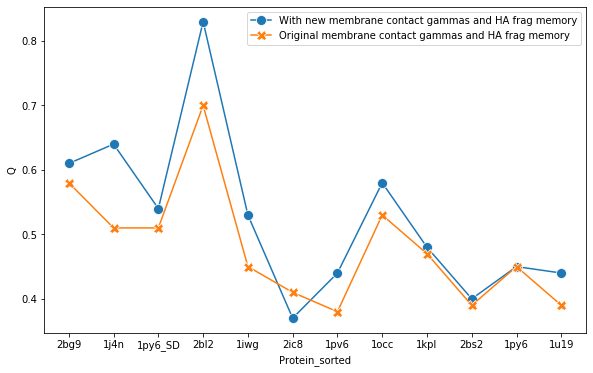

In [54]:
y = "Q"
# d = pd.concat([data, previous_data])
d = data
d = d.query("Folder != 'ha_frag_complete_opt_cutoff722' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory"])

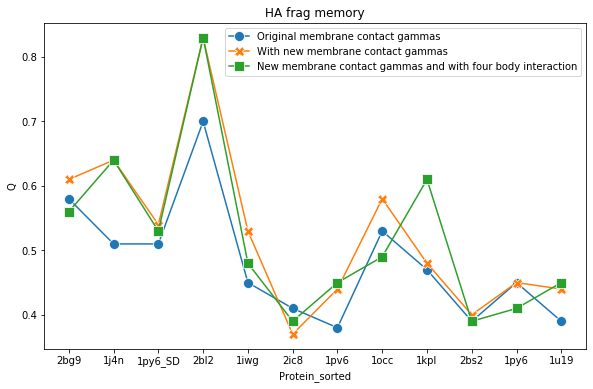

In [66]:
# ha_frag_complete_opt_cutoff722 is not as good as complete_cutoff722_all_prime_oct14
y = "Q"
# d = pd.concat([data, previous_data])
d = data
d = d.query("Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['ha_frag', 'ha_new_model15_all_prime', 'ha_frag_complete_opt_cutoff722',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
plt.title("HA frag memory")
plt.legend(["Original membrane contact gammas ", "With new membrane contact gammas", "New membrane contact gammas and with four body interaction"])
# plt.legend(["standard AWSEM", "With new contact gammas", "No contact term"])
# plt.legend([ "Original membrane contact gammas with HA frag memory", "standard AWSEM with HA frag memory"])
# plt.legend([ "With new membrane contact gammas and HA frag memory", "Original membrane contact gammas and HA frag memory"])

In [12]:


pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
# I removed 1rhz because the subunit is not stable.

pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]

# pdb_list = ["2bg9", "1j4n", "1py6_SD", "1iwg", "2ic8", "1pv6", "1kpl", "2bs2", "1py6", "1u19"]

# remove 1kpl, 

simulationType = "membrane_protein_structure_prediction"
run_n = 20
# folder_list = ["run3_top50_v3", "run3_top50_v2", "run3_top50", "run3_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_with_contact", "run2_cbd"]
# folder_list = ["six_letter_300", "six_letter_1232", "standard_timeStep2", "standard"]
# folder_list = ["six_letter_weighted", "six_letter_1100_divide_3", "six_letter_limit_max_1", "six_letter_limit_max", "six_letter_1232_msa_c_0", "standard_timeStep2"]
folder_list = ["ha_frag", "he_frag", "new_contact_only_cutoff450", "new_contact_only_cutoff550", "ha_frag_new_contact_only_cutoff550"]
folder_list = [ "ha_frag_complete_opt_cutoff722", "ha_frag_new_contact_only_cutoff450", "ha_frag", "ha_frag_new_contact_only_cutoff550"]
folder_list = [ "new_contact_only_cutoff550", "new_model15_all_prime"]



month_dic = {"new_contact_only_cutoff550":"sep_2020", "new_model15_all_prime":"oct_2020"}

all_data = []

for folder in folder_list:
    print(folder)
    month = month_dic[folder]
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/{month}/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder, location)
                    pass
data = pd.concat(all_data, sort=False)

today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

new_contact_only_cutoff550
new_model15_all_prime
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_new_model15_all_prime_10-13.csv


In [13]:
previous_data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_standard_timeStep2_09-29.csv").reset_index(drop=True)

In [14]:
previous_data["Folder"].unique()

array(['single_frag_new_cb', 'no_contact', 'new_contact_only_cutoff550',
       'standard_timeStep2'], dtype=object)

In [15]:
previous_data = previous_data.query("Folder == 'standard_timeStep2' or Folder == 'no_contact'").reset_index(drop=True)

In [12]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_new_model15_all_prime_10-13.csv")
data = data.reset_index(drop=True)

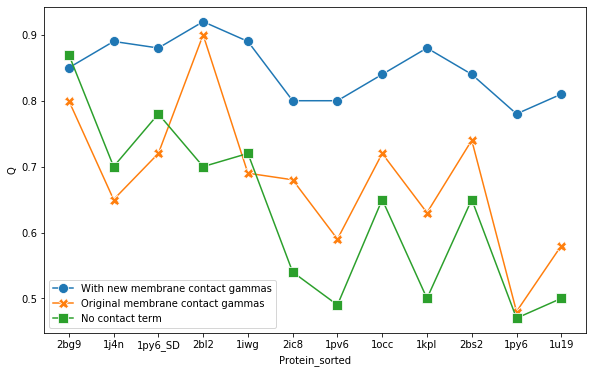

In [16]:
y = "Q"
d = pd.concat([data, previous_data])
d = d.query("Folder != 'new_contact_only_cutoff550' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
plt.legend(["With new membrane contact gammas", "Original membrane contact gammas ", "No contact term"])

In [29]:
max_Q_data

Unnamed: 0  Steps     Q     Rg  GXXXG  CBD_excl  S_chain  Helix_ori  \
0       678419   1743  0.89  17.14    0.0       0.0      0.0        0.0   
1      1624628   1006  0.69  16.80    0.0       0.0      0.0        0.0   
2       532198   1668  0.89  16.83    0.0       0.0      0.0        0.0   
3      1504521   1019  0.65  17.15    0.0       0.0      0.0        0.0   
4       804566   1764  0.88  17.95    0.0       0.0      0.0        0.0   
5      1770871   1103  0.63  19.26    0.0       0.0      0.0        0.0   
6       768141   1375  0.84  19.09    0.0       0.0      0.0        0.0   
7      1726835   1111  0.72  18.88    0.0       0.0      0.0        0.0   
8       758468   1712  0.80  17.02    0.0       0.0      0.0        0.0   
9      1696794   1100  0.59  16.49    0.0       0.0      0.0        0.0   
10      882346   1466  0.78  18.18    0.0       0.0      0.0        0.0   
11     1855236   1384  0.48  17.77    0.0       0.0      0.0        0.0   
12      576356   1782  0.88  15.59    0.0       0.0      0.0        0.0   
13     1528583   1057  0.72  15.61    0.0       0.0      0.0        0.0   
14      938584   1648  0.81  19.52    0.0       0.0      0.0        0.0   
15     1917283   1369  0.58  19.07    0.0       0.0      0.0        0.0   
16      498170   1674  0.85  14.66    0.0       0.0      0.0        0.0   
17     1448751   1305  0.80  14.57    0.0       0.0      0.0        0.0   
18      620615   1997  0.92  17.62    0.0       0.0      0.0        0.0   
19     1566866   1302  0.90  17.63    0.0       0.0      0.0        0.0   
20      862287   1427  0.84  19.32    0.0       0.0      0.0        0.0   
21     1827118   1294  0.74  19.35    0.0       0.0      0.0        0.0   
22      682609   1929  0.80  15.43    0.0       0.0      0.0        0.0   
23     1674768   1096  0.68  15.21    0.0       0.0      0.0        0.0   

    Backbone     Rama  ...  TBM_Q  Beta  Pap  Helical  P_inside    Total  Run  \
0     354.85 -1184.25  ...    0.0   0.0  0.0      0.0     29.92 -1643.75   18   
1     579.69 -1150.64  ...    0.0   0.0  0.0      0.0     31.52 -1509.50   11   
2     249.60  -800.27  ...    0.0   0.0  0.0      0.0     26.76 -1102.60    5   
3     429.80  -764.34  ...    0.0   0.0  0.0      0.0     28.18  -968.45   11   
4     398.99 -1341.20  ...    0.0   0.0  0.0      0.0     18.95 -1899.88    1   
5     650.01 -1289.18  ...    0.0   0.0  0.0      0.0     19.34 -1767.24    4   
6     497.48 -1352.92  ...    0.0   0.0  0.0      0.0      0.00 -1763.61    3   
7     629.43 -1311.67  ...    0.0   0.0  0.0      0.0      0.00 -1776.52    2   
8     404.02 -1325.84  ...    0.0   0.0  0.0      0.0      7.68 -1814.19   18   
9     639.62 -1290.04  ...    0.0   0.0  0.0      0.0      7.51 -1738.02    7   
10    568.52 -1693.04  ...    0.0   0.0  0.0      0.0     33.71 -2203.07    0   
11    586.98 -1688.55  ...    0.0   0.0  0.0      0.0     35.37 -2433.78    6   
12    247.46  -932.06  ...    0.0   0.0  0.0      0.0     21.78 -1276.83    7   
13    422.73  -896.14  ...    0.0   0.0  0.0      0.0     22.39 -1134.65    3   
14    624.62 -1932.71  ...    0.0   0.0  0.0      0.0     14.09 -2689.53    8   
15    738.20 -1915.67  ...    0.0   0.0  0.0      0.0     13.01 -2877.07   17   
16    204.54  -711.84  ...    0.0   0.0  0.0      0.0      8.67  -934.20    8   
17    264.35  -687.21  ...    0.0   0.0  0.0      0.0      8.14  -919.62    3   
18    210.75 -1121.05  ...    0.0   0.0  0.0      0.0      0.99 -1615.34    9   
19    399.28 -1086.66  ...    0.0   0.0  0.0      0.0      1.00 -1524.94    2   
20    540.15 -1648.64  ...    0.0   0.0  0.0      0.0     56.90 -2150.58   10   
21    608.60 -1631.84  ...    0.0   0.0  0.0      0.0     55.56 -2269.91   12   
22    285.64 -1158.86  ...    0.0   0.0  0.0      0.0     22.23 -1746.50    0   
23    596.21 -1108.30  ...    0.0   0.0  0.0      0.0     22.06 -1529.51   16   

    Protein                 Folder  Protein_sorted  
0      1iwg  new_model15_all_prime            1iw

In [25]:
max_Q_data["Folder"].unique()

array(['new_model15_all_prime', 'standard_timeStep2'], dtype=object)

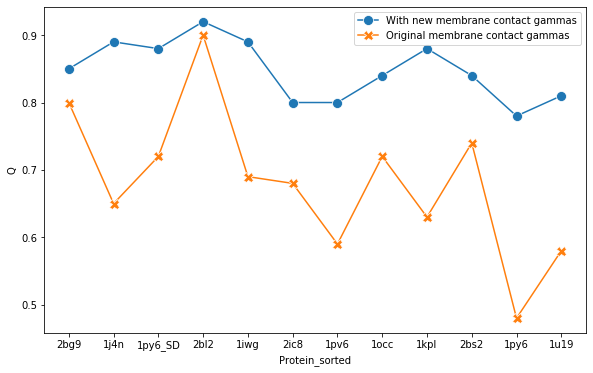

In [32]:
y = "Q"
d = pd.concat([data, previous_data])
d = d.query("Folder != 'no_contact' and Folder != 'new_contact_only_cutoff550' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
max_Q_data["Folder"] = pd.Categorical(max_Q_data["Folder"], ['new_model15_all_prime', 'standard_timeStep2',])
# sub_data = max_Q_data.sort_values("Protein_sorted")
sub_data = max_Q_data.sort_values(["Protein_sorted", "Folder"])

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
plt.legend(["With new membrane contact gammas", "Original membrane contact gammas "])

In [9]:

pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
# I removed 1rhz because the subunit is not stable.

pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]

# pdb_list = ["2bg9", "1j4n", "1py6_SD", "1iwg", "2ic8", "1pv6", "1kpl", "2bs2", "1py6", "1u19"]

# remove 1kpl, 

simulationType = "membrane_protein_structure_prediction"
run_n = 20
# folder_list = ["run3_top50_v3", "run3_top50_v2", "run3_top50", "run3_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_with_contact", "run2_cbd"]
# folder_list = ["six_letter_300", "six_letter_1232", "standard_timeStep2", "standard"]
# folder_list = ["six_letter_weighted", "six_letter_1100_divide_3", "six_letter_limit_max_1", "six_letter_limit_max", "six_letter_1232_msa_c_0", "standard_timeStep2"]
folder_list = ["ha_frag", "he_frag", "new_contact_only_cutoff450", "new_contact_only_cutoff550", "ha_frag_new_contact_only_cutoff550"]
folder_list = [ "ha_frag_complete_opt_cutoff722", "ha_frag_new_contact_only_cutoff450", "ha_frag", "ha_frag_new_contact_only_cutoff550"]
folder_list = [ "ha_frag_complete_opt_cutoff722", "ha_frag_complete_opt_cutoff722_oct11"]



month_dic = {"ha_frag_complete_opt_cutoff722":"sep_2020", "ha_frag_complete_opt_cutoff722_oct11":"oct_2020"}




all_data = []

for folder in folder_list:
    print(folder)
    month = month_dic[folder]
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/{month}/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder, location)
                    pass
data = pd.concat(all_data, sort=False)

today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

ha_frag_complete_opt_cutoff722
ha_frag_complete_opt_cutoff722_oct11
/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ha_frag_complete_opt_cutoff722_oct11_10-12.csv


In [10]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ha_frag_complete_opt_cutoff722_oct11_10-12.csv")
data = data.reset_index(drop=True)

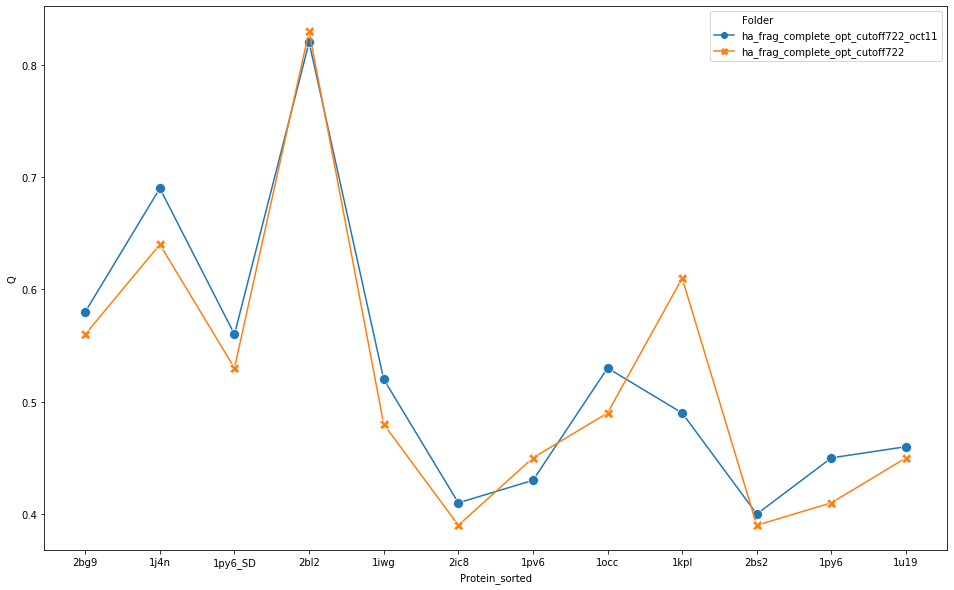

In [11]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'six_letter_weighted' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

In [6]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ha_frag_new_contact_only_cutoff550_10-08.csv")
data = data.reset_index(drop=True)

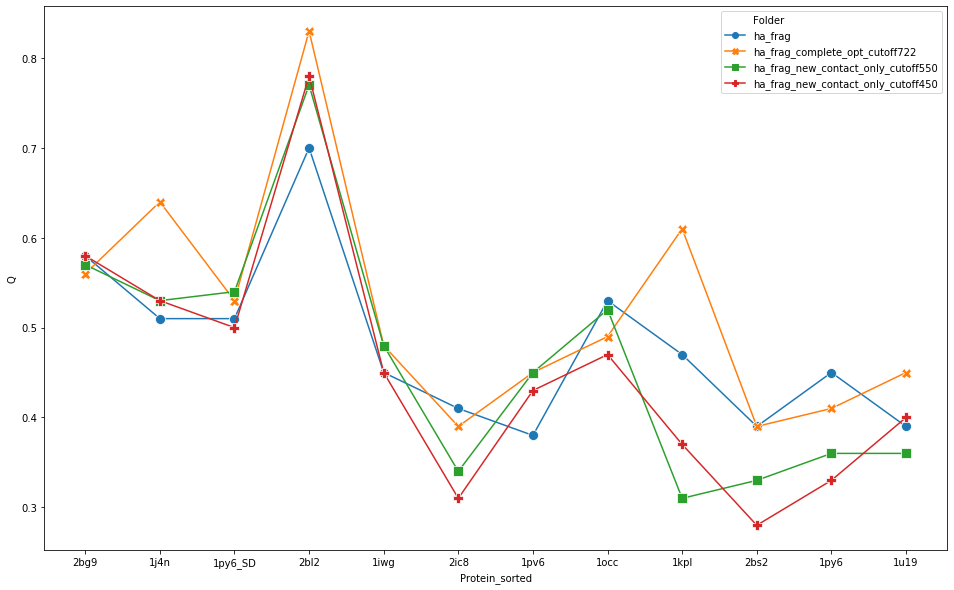

In [7]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'six_letter_weighted' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

In [24]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_ha_frag_new_contact_only_cutoff550_10-02.csv")
data = data.reset_index(drop=True)

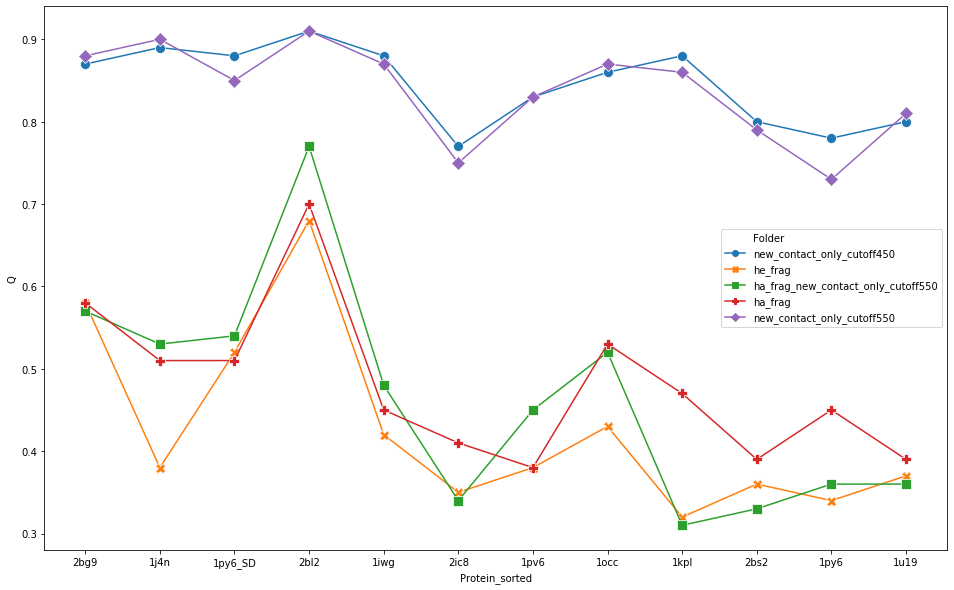

In [25]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'six_letter_weighted' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

In [11]:
pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
# I removed 1rhz because the subunit is not stable.

pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]

# pdb_list = ["2bg9", "1j4n", "1py6_SD", "1iwg", "2ic8", "1pv6", "1kpl", "2bs2", "1py6", "1u19"]


simulationType = "membrane_protein_structure_prediction"
run_n = 20
# folder_list = ["run3_top50_v3", "run3_top50_v2", "run3_top50", "run3_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_with_contact", "run2_cbd"]
# folder_list = ["six_letter_300", "six_letter_1232", "standard_timeStep2", "standard"]
# folder_list = ["six_letter_weighted", "six_letter_1100_divide_3", "six_letter_limit_max_1", "six_letter_limit_max", "six_letter_1232_msa_c_0", "standard_timeStep2"]
folder_list = ["he_frag_separate_optimized", "he_frag_complete_opt", "he_frag_no_contact", "he_frag_new_contact", "he_frag"]





all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/sep_2020/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder, location)
                    pass
data = pd.concat(all_data, sort=False)

today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_he_frag_09-28.csv


In [12]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_he_frag_09-28.csv")
data = data.reset_index(drop=True)





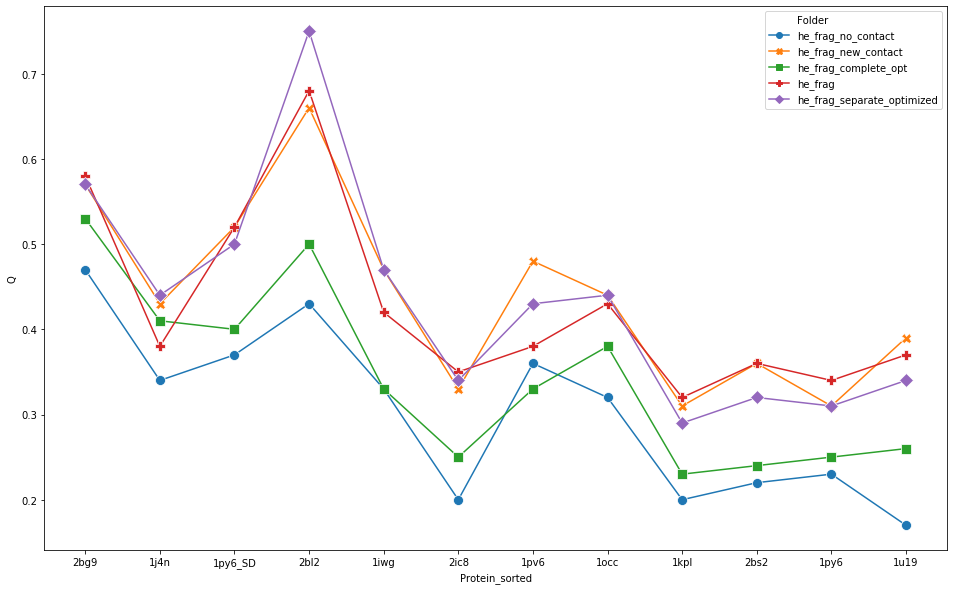

In [13]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'six_letter_weighted' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

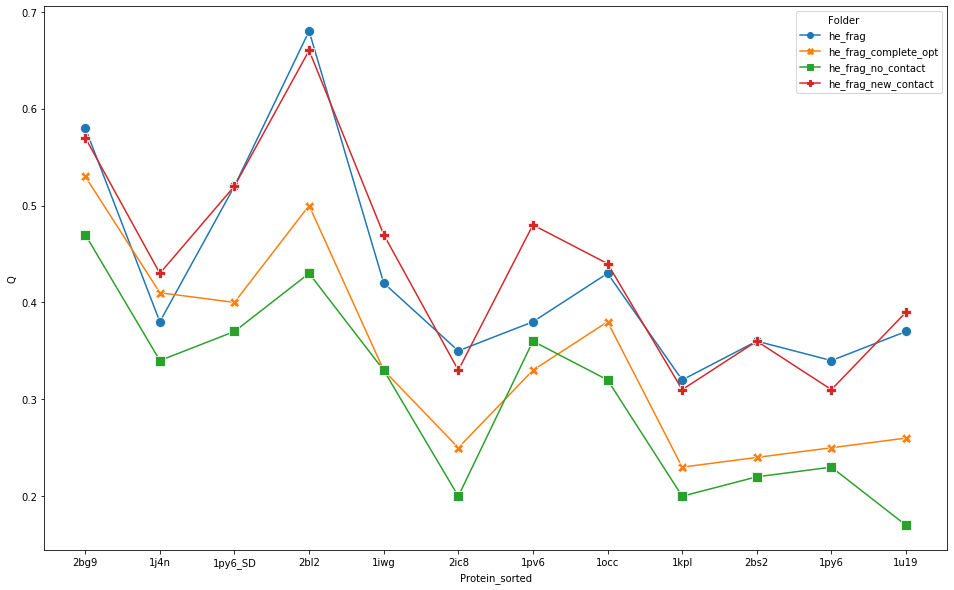

In [9]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'six_letter_weighted' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

In [14]:
pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
# I removed 1rhz because the subunit is not stable.

pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]

# pdb_list = ["2bg9", "1j4n", "1py6_SD", "1iwg", "2ic8", "1pv6", "1kpl", "2bs2", "1py6", "1u19"]


simulationType = "membrane_protein_structure_prediction"
run_n = 20
# folder_list = ["run3_top50_v3", "run3_top50_v2", "run3_top50", "run3_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_with_contact", "run2_cbd"]
# folder_list = ["six_letter_300", "six_letter_1232", "standard_timeStep2", "standard"]
# folder_list = ["six_letter_weighted", "six_letter_1100_divide_3", "six_letter_limit_max_1", "six_letter_limit_max", "six_letter_1232_msa_c_0", "standard_timeStep2"]
# folder_list = ["he_frag_new_contact", "he_frag", "no_contact", "new_contact_only_cutoff550", "six_letter_weighted", "six_letter_1100_divide_3", "six_letter_1232_msa_c_0", "standard_timeStep2"]
# folder_list = ["no_contact", "new_contact_only_cutoff550", "six_letter_weighted", "six_letter_1100_divide_3", "six_letter_1232_msa_c_0", "standard_timeStep2"]
folder_list = ["single_frag_new_cb", "no_contact", "new_contact_only_cutoff550", "standard_timeStep2"]






all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/sep_2020/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder, location)
                    pass
data = pd.concat(all_data, sort=False)

today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_standard_timeStep2_09-29.csv


In [15]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_standard_timeStep2_09-29.csv")
data = data.reset_index(drop=True)




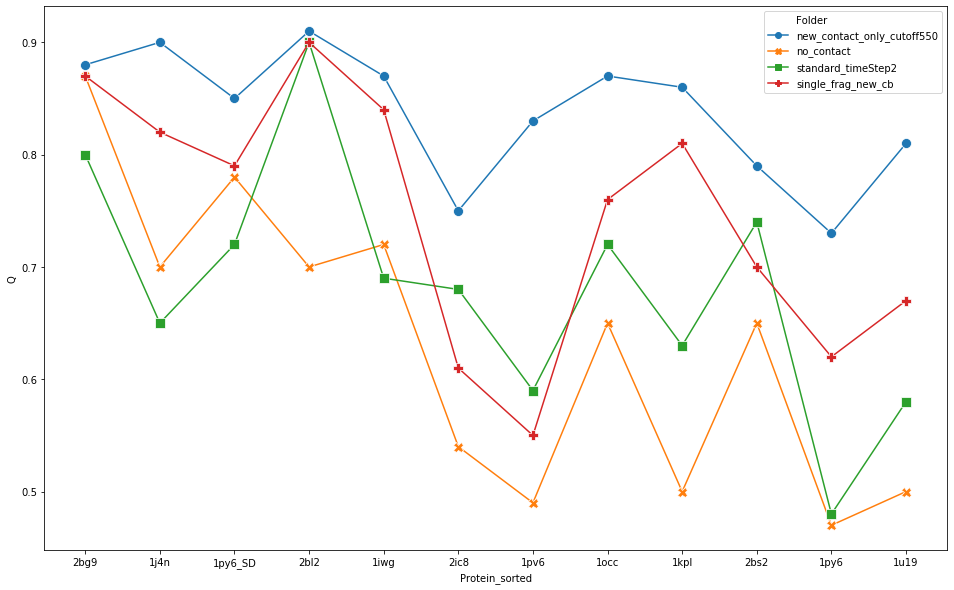

In [16]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'six_letter_weighted' and Folder != 'six_letter_1232_msa_c_0' and Folder != 'six_letter_1100_divide_3' and Folder != 'new_contact_only' and Folder != 'six_letter_limit_max' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
# sub_data = max_Q_data
max_Q_data["Protein_sorted"] = pd.Categorical(max_Q_data["Protein"], pdb_list)
sub_data = max_Q_data.sort_values("Protein_sorted")

ax = sns.lineplot(x="Protein_sorted", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

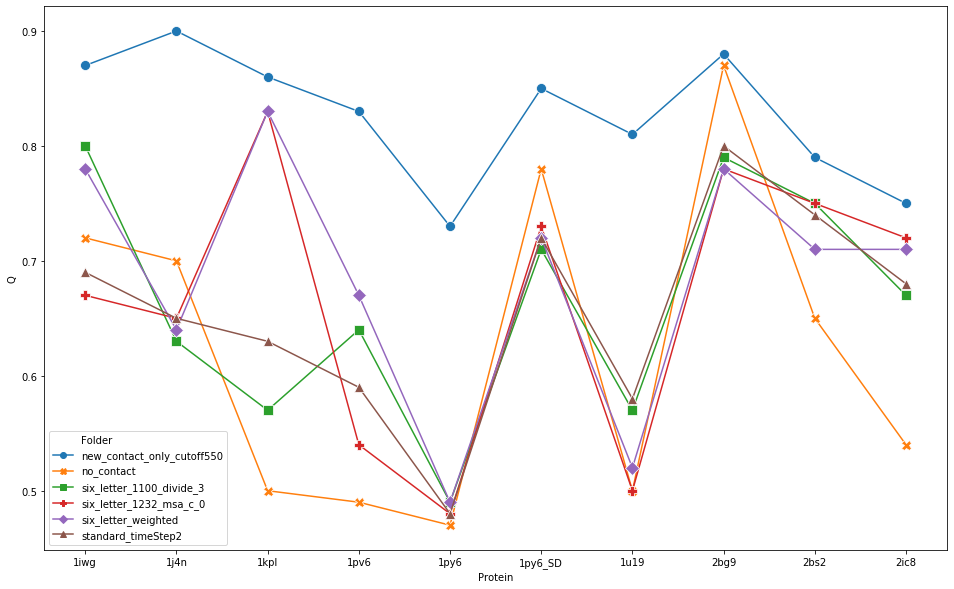

In [11]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'new_contact_only' and Folder != 'six_letter_limit_max'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

In [34]:
pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]
# I removed 1rhz because the subunit is not stable.

pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]


simulationType = "membrane_protein_structure_prediction"
run_n = 10
# folder_list = ["run3_top50_v3", "run3_top50_v2", "run3_top50", "run3_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_with_contact", "run2_cbd"]
# folder_list = ["six_letter_300", "six_letter_1232", "standard_timeStep2", "standard"]
folder_list = ["six_letter_1232_msa_c_0", "six_letter_300_msa_c_0", "six_letter_300", "standard_timeStep2"]


all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/aug_2020/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder, location)
                    pass
data = pd.concat(all_data, sort=False)

today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_standard_timeStep2_09-10.csv


In [35]:
plt.rcParams['figure.figsize'] = 1*np.array([16.18033, 10])    #golden ratio

In [36]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_standard_timeStep2_09-10.csv")
data = data.reset_index(drop=True)



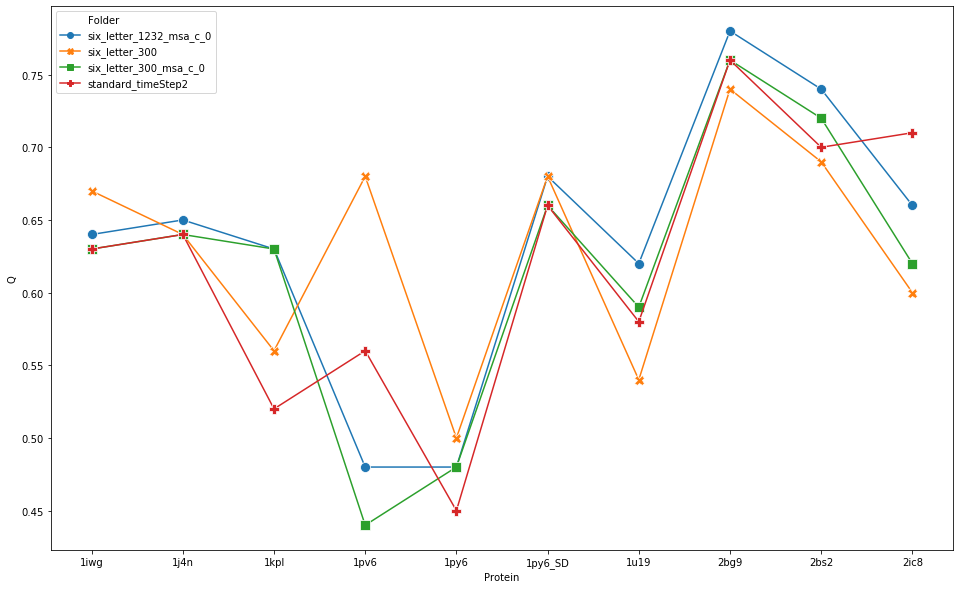

In [37]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

In [40]:
data.query("Steps==1 and Run==0")

Unnamed: 0  Steps     Q     Rg  GXXXG  CBD_excl  S_chain  Helix_ori  \
1                1      1  0.97  14.96   0.06       0.0      0.0        0.0   
20021        20021      1  0.99  16.87  -0.57       0.0      0.0        0.0   
40041        40041      1  0.99  15.52  -0.30       0.0      0.0        0.0   
60061        60061      1  0.99  17.58  -6.85       0.0      0.0        0.0   
80081        80081      1  0.99  17.21  -1.10       0.0      0.0        0.0   
100101      100101      1  0.99  15.73  -1.34       0.0      0.0        0.0   
120121      120121      1  0.98  17.07  -1.12       0.0      0.0        0.0   
140141      140141      1  0.99  19.10  -0.62       0.0      0.0        0.0   
160161      160161      1  0.98  18.03  -9.64       0.0      0.0        0.0   
180181      180181      1  0.99  19.16  -0.30       0.0      0.0        0.0   
200201      200201      1  0.99  17.83  -0.30       0.0      0.0        0.0   
220221      220221      1  0.99  19.64  -2.11       0.0      0.0        0.0   
240241      240241      1  0.97  14.95   0.42       0.0      0.0        0.0   
260261      260261      1  0.99  16.87  -4.79       0.0      0.0        0.0   
280281      280281      1  0.99  15.52  -2.45       0.0      0.0        0.0   
300301      300301      1  0.99  17.58 -14.98       0.0      0.0        0.0   
320321      320321      1  0.99  17.20  -9.88       0.0      0.0        0.0   
340341      340341      1  0.98  15.67 -10.29       0.0      0.0        0.0   
360361      360361      1  0.98  17.06  -3.52       0.0      0.0        0.0   
380381      380381      1  0.99  19.10  -4.07       0.0      0.0        0.0   
400401      400401      1  0.99  18.02 -45.80       0.0      0.0        0.0   
420421      420421      1  0.99  19.16   1.33       0.0      0.0        0.0   
440441      440441      1  0.99  17.84  -2.00       0.0      0.0        0.0   
460461      460461      1  0.98  19.64  -5.18       0.0      0.0        0.0   
480481      480481      1  0.97  14.95  -0.17       0.0      0.0        0.0   
500501      500501      1  0.99  16.86 -14.41       0.0      0.0        0.0   
520521      520521      1  0.99  15.52  -6.57       0.0      0.0        0.0   
540541      540541      1  0.98  17.57 -38.76       0.0      0.0        0.0   
560561      560561      1  0.98  17.20 -31.22       0.0      0.0        0.0   
580581      580581      1  0.99  15.72 -19.93       0.0      0.0        0.0   
600601      600601      1  0.98  17.06  -9.03       0.0      0.0        0.0   
620621      620621      1  0.99  19.10 -11.77       0.0      0.0        0.0   
640641      640641      1  0.99  18.01 -76.92       0.0      0.0        0.0   
660661      660661      1  0.99  19.16  -4.80       0.0      0.0        0.0   
680681      680681      1  0.99  17.83 -14.27       0.0      0.0        0.0   
700701      700701      1  0.98  19.63 -21.24       0.0      0.0        0.0   
720721      720721      1  0.97  14.96   0.00       0.0      0.0        0.0   
740741      740741      1  0.99  16.87   0.00       0.0      0.0        0.0   
760761      760761      1  0.99  15.52   0.00       0.0      0.0        0.0   
780781      780781      1  0.99  17.59   0.00       0.0      0.0        0.0   
800801      800801      1  0.99  17.21   0.00       0.0      0.0        0.0   
820821      820821      1  0.98  15.72   0.00       0.0      0.0        0.0   
840841      840841      1  0.98  17.07   0.00       0.0      0.0        0.0   
860861      860861      1  0.99  19.10   0.00       0.0      0.0        0.0   
880881      880881      1  0.99  18.04   0.00       0.0      0.0        0.0   
900901      900901      1  0.99  19.16   0.00       0.0      0.0        0.0   
920921      920921      1  0.98  17.84   0.00       0.0      0.0        0.0   
940941      940941      1  0.98  19.64   0.00       0.0      0.0        0.0   

        Backbone     Rama  ...   ER  TBM_Q  Beta  Pap  Helical  P_inside  \
1          10.48  -720.36  ...  0.0    0.0   0.0  0.0      0

In [19]:
240432.67/601095.5578173432

0.39999076165700276

In [7]:
pdb_list = ["2bg9", "1j4n", "1py6_SD", "2bl2", "1rhz", "1iwg", "2ic8", "1pv6", "1occ", "1kpl", "2bs2", "1py6", "1u19"]


simulationType = "membrane_protein_structure_prediction"
run_n = 10
# folder_list = ["run3_top50_v3", "run3_top50_v2", "run3_top50", "run3_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_center_with_contact", "run2_cbd_gxxxg_701_with_contact", "run2_cbd"]
folder_list = ["run3_cluster20_sideMem", "run3_cluster20", "run3_top50_v3", "run3_top50_v2", "run3_top50"]



all_data = []

for folder in folder_list:
    for pdb in pdb_list:
        for i in range(run_n):
                pre = f"/Users/weilu/Research/server/jul_week1_2020/{simulationType}/{folder}/{pdb}/{i}"
                info_file = "info.dat"
                location = f"{pre}/{info_file}"
                try:
                    tmp = pd.read_csv(location, sep="\s+")
                    tmp = tmp.assign(Run=i, Protein=pdb, Folder=folder)
                    all_data.append(tmp)
                except:
                    print(pdb, i, folder, location)
                    pass
data = pd.concat(all_data, sort=False)

today = datetime.today().strftime('%m-%d')
outFile = f"/Users/weilu/Research/data/openMM/{simulationType}_{folder}_{today}.csv"
data.reset_index(drop=True).to_csv(outFile)
print(outFile)

/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run3_top50_08-14.csv


In [8]:
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio

In [9]:
# data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_08-02.csv")
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run3_top50_08-14.csv")
data = data.reset_index(drop=True)


In [10]:
plt.rcParams['figure.figsize'] = 1*np.array([16.18033, 10])    #golden ratio

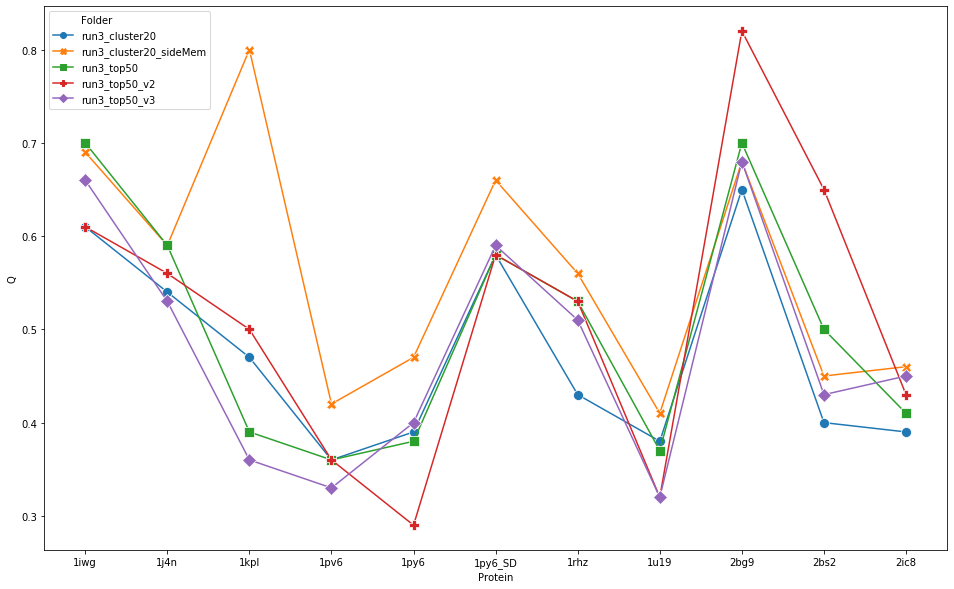

In [11]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

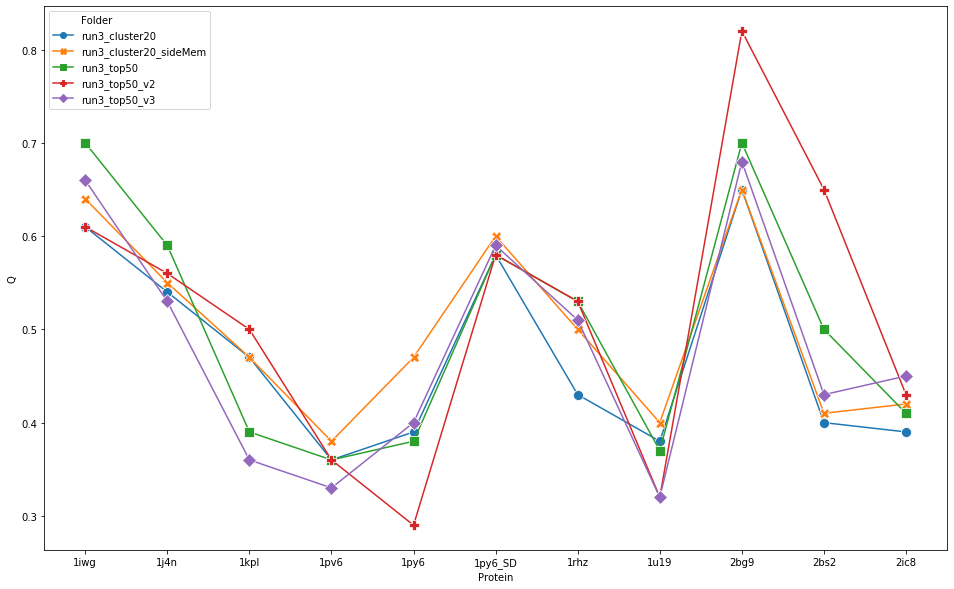

In [6]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

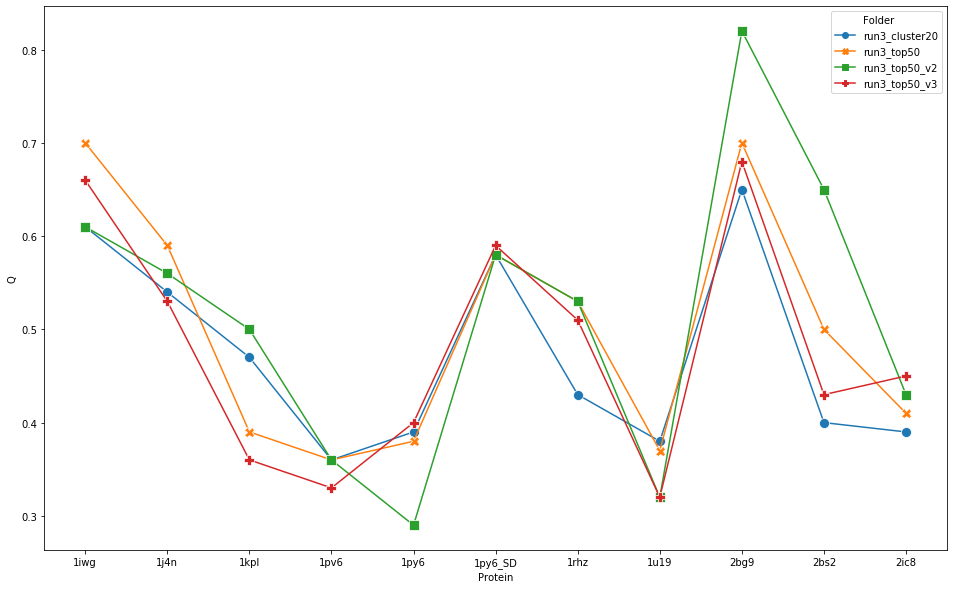

In [33]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

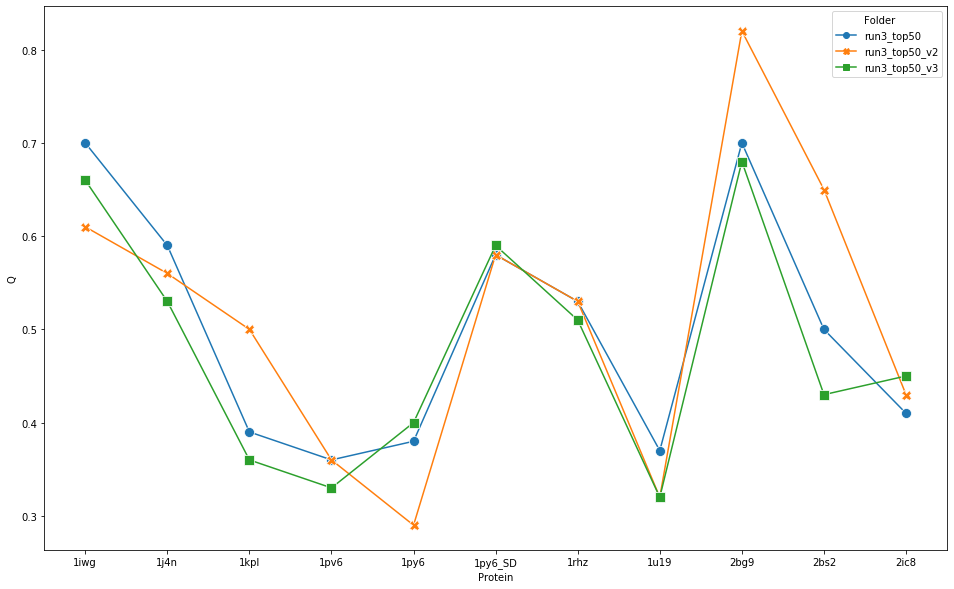

In [19]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

In [22]:
d.shape

(330330, 23)

In [23]:
data.shape

(780780, 23)

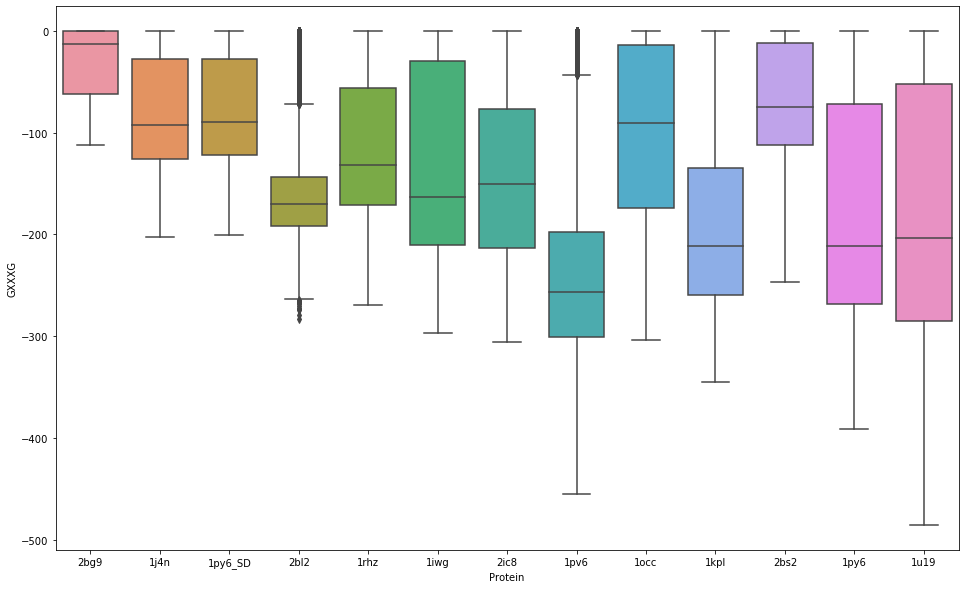

In [27]:
sns.boxplot("Protein", "GXXXG", data=data.query("Folder=='run3_top50_v3'"))

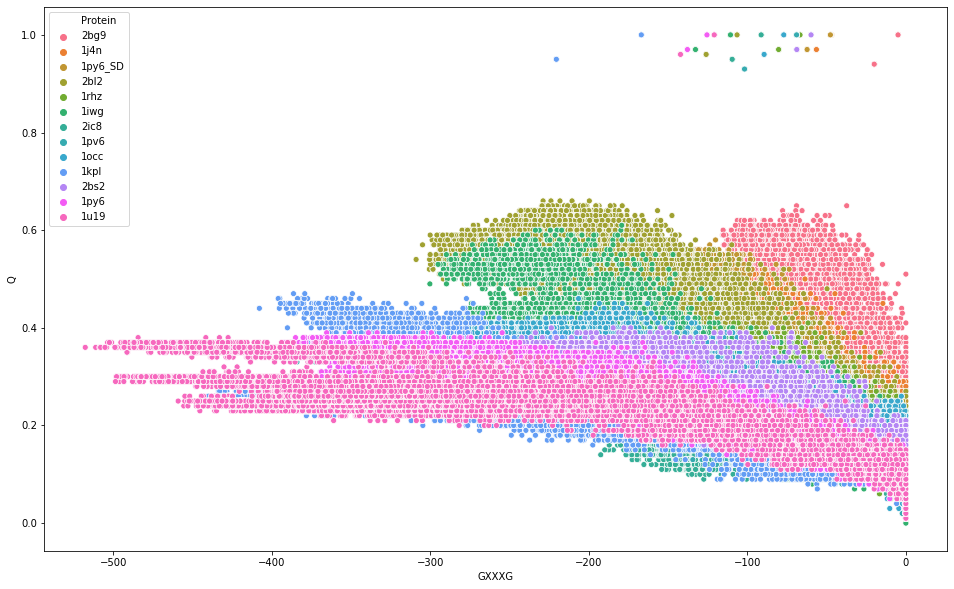

In [34]:
sns.scatterplot("GXXXG", "Q", data=data.query("Folder=='run3_cluster20'"), hue="Protein")

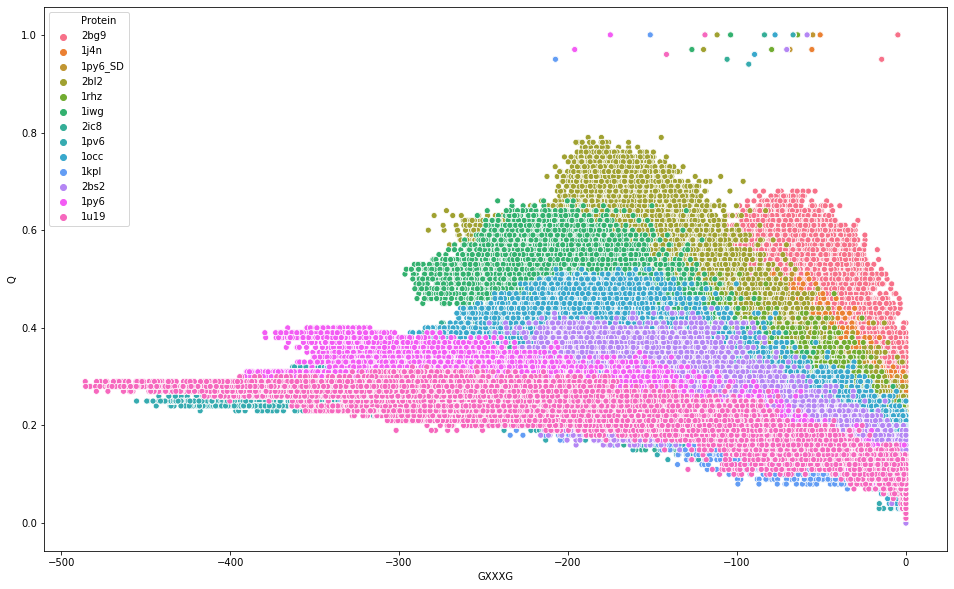

In [26]:
sns.scatterplot("GXXXG", "Q", data=data.query("Folder=='run3_top50_v3'"), hue="Protein")

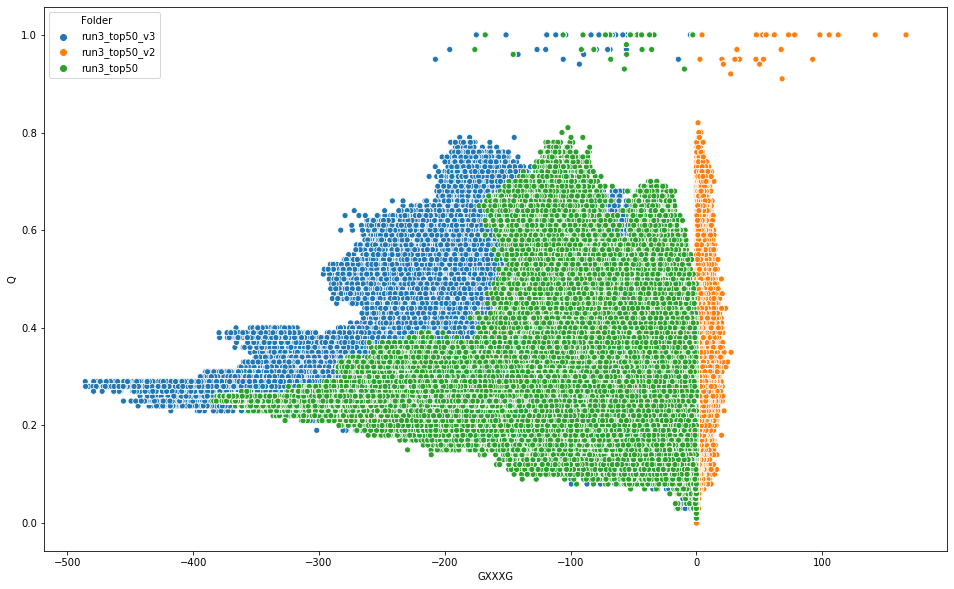

In [25]:
sns.scatterplot("GXXXG", "Q", data=data, hue="Folder")

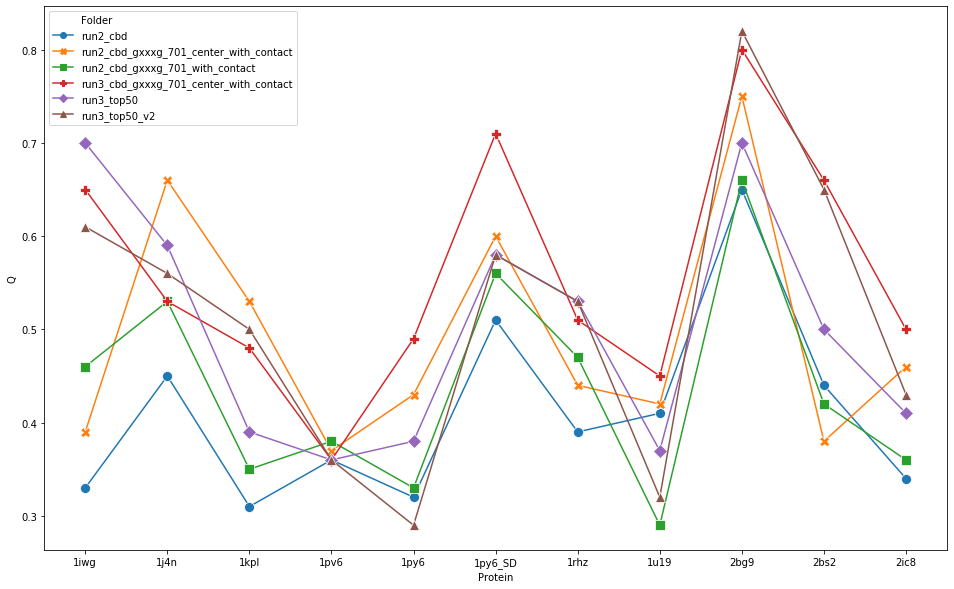

In [15]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

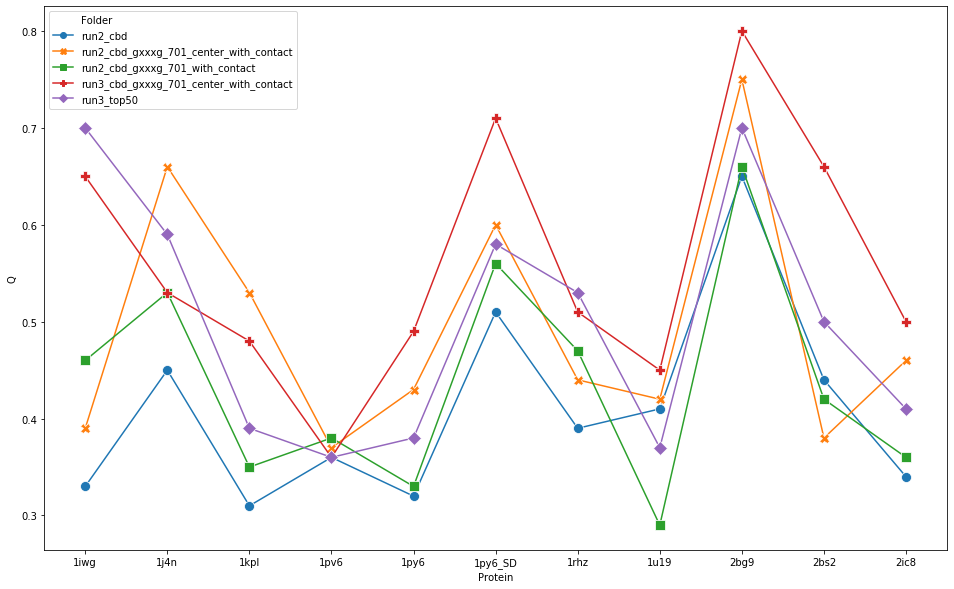

In [6]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

In [9]:
t = data.query("Folder == 'run3_top50'")

In [10]:
t

Unnamed: 0  Steps     Q     Rg   GXXXG  CBD_excl  S_chain  Helix_ori  \
0                0      0  1.00  14.79   -2.87     34.05    31.30        0.0   
1                1      1  0.93  14.96   -9.55      5.73  -146.02        0.0   
2                2      2  0.03  59.34    0.00     27.00   471.36        0.0   
3                3      3  0.07  51.24    0.00     11.43   447.15        0.0   
4                4      4  0.09  46.67    0.00     29.41   398.22        0.0   
...            ...    ...   ...    ...     ...       ...      ...        ...   
260255      260255   1997  0.26  20.14 -181.73     48.44   342.64        0.0   
260256      260256   1998  0.25  20.27 -191.24     48.22   247.57        0.0   
260257      260257   1999  0.25  20.04 -191.27     55.24   223.41        0.0   
260258      260258   2000  0.25  20.25 -183.60     56.23   474.06        0.0   
260259      260259   2001  0.25  20.21 -189.17     48.11   235.62        0.0   

        Backbone     Rama  ...   ER   TBM_Q  Beta  Pap  Helical  P_inside  \
0         867.39  -485.33  ...  0.0  164.16   0.0  0.0      0.0     10.42   
1          46.91  -717.27  ...  0.0    3.02   0.0  0.0      0.0      9.60   
2         632.05  -145.64  ...  0.0   12.40   0.0  0.0      0.0      8.02   
3         663.24  -183.89  ...  0.0   15.31   0.0  0.0      0.0     11.59   
4         769.26  -132.98  ...  0.0   10.16   0.0  0.0      0.0      7.87   
...          ...      ...  ...  ...     ...   ...  ...      ...       ...   
260255    742.52 -1846.67  ...  0.0   63.42   0.0  0.0      0.0     57.64   
260256    615.74 -1855.84  ...  0.0   39.97   0.0  0.0      0.0     58.85   
260257    707.04 -1818.97  ...  0.0   35.01   0.0  0.0      0.0     59.23   
260258    953.53 -1775.67  ...  0.0   48.50   0.0  0.0      0.0     57.01   
260259    619.53 -1872.15  ...  0.0   48.50   0.0  0.0      0.0     60.47   

          Total  Run  Protein      Folder  
0       -109.17    0     2bg9  run3_top50  
1      -1319.39    0     2bg9  run3_top50  
2        284.63    0     2bg9  run3_top50  
3        252.21    0     2bg9  run3_top50  
4        382.36    0     2bg9  run3_top50  
...         ...  ...      ...         ...  
260255 -2851.47    9     1u19  run3_top50  
260256 -3036.73    9     1u19  run3_top50  
260257 -2919.10    9     1u19  run3_top50  
260258 -2573.51    9     1u19  run3_top50  
260259 -3030.66    9     1u19  run3_top50  

[260260 rows x 23 columns]

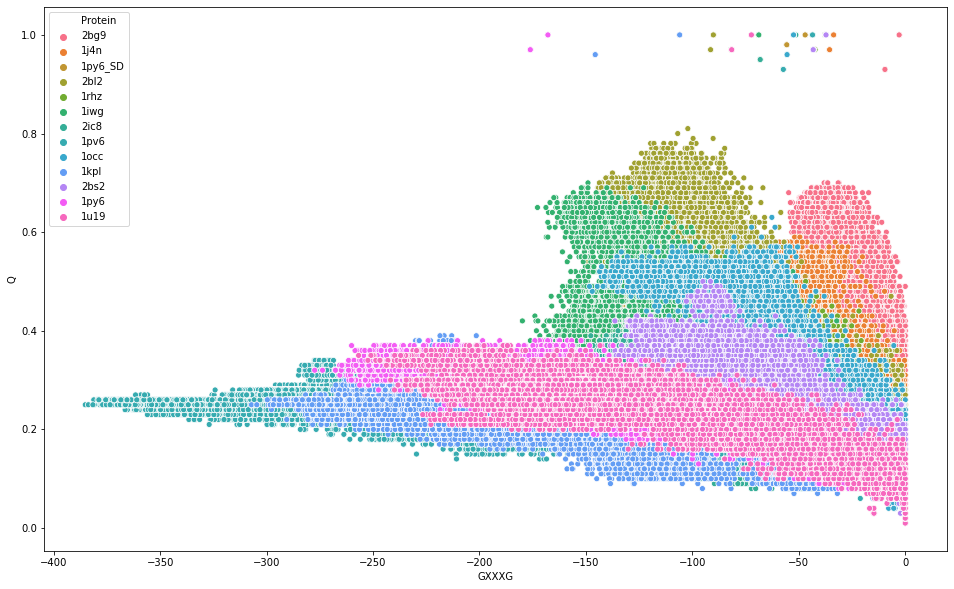

In [11]:
sns.scatterplot("GXXXG", "Q", data=t, hue="Protein")

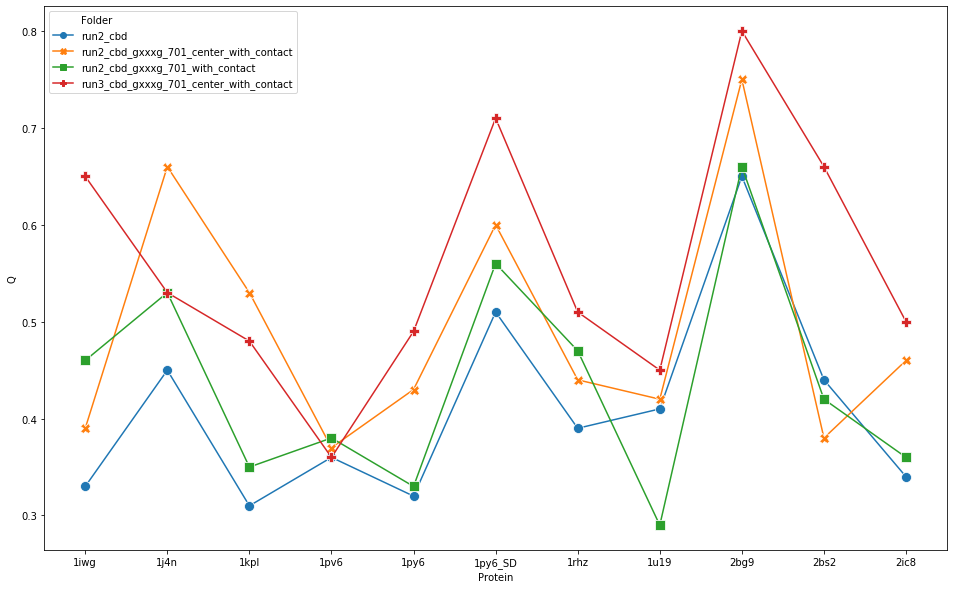

In [35]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

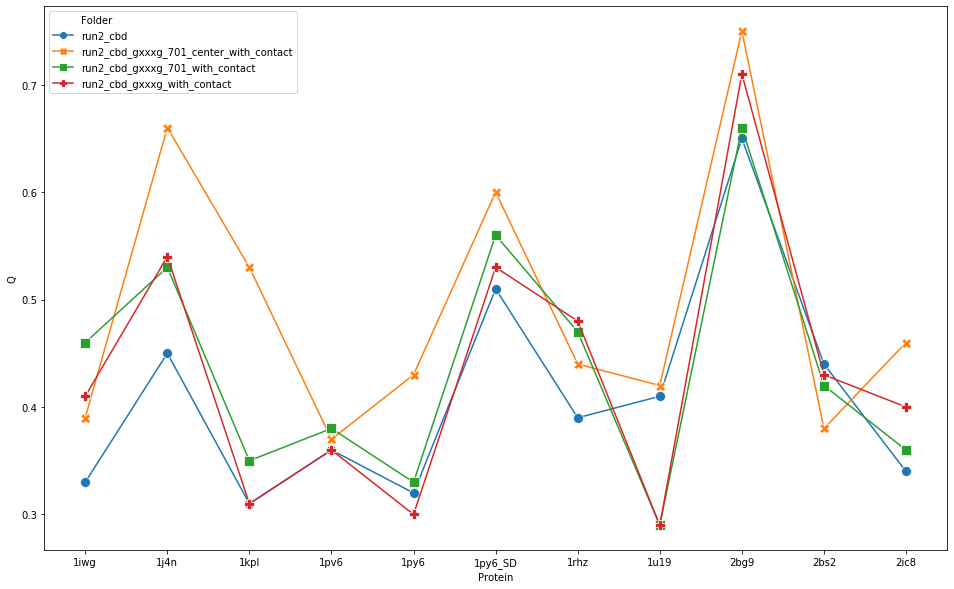

In [24]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

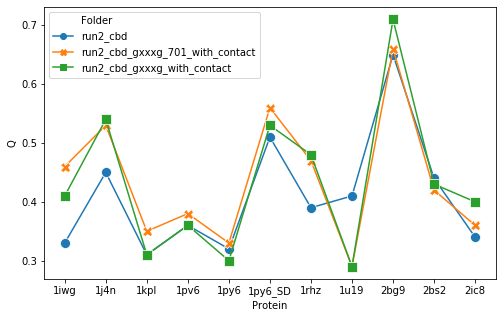

In [18]:
y = "Q"
d = data.query("Folder != 'run1_correct'")
d = d.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

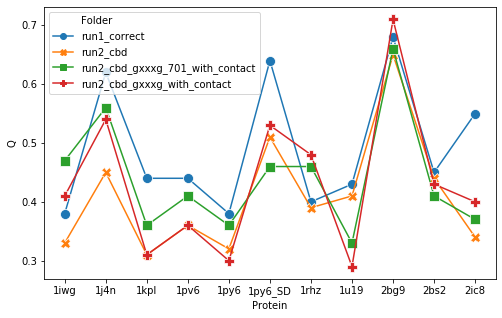

In [7]:
y = "Q"
d = data.query("Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["standard AWSEM", "with GxxxG term"])

In [13]:
a = data.query("Protein=='1iwg' and Folder == 'run2_cbd_gxxxg_701_with_contact'")

In [11]:
a.columns

Index(['Unnamed: 0', 'Steps', 'Q', 'Rg', 'GXXXG', 'CBD_excl', 'S_chain',
       'Helix_ori', 'Backbone', 'Rama', 'Contact', 'Fragment', 'Membrane',
       'ER', 'TBM_Q', 'Beta', 'Pap', 'Helical', 'P_inside', 'Total', 'Run',
       'Protein', 'Folder'],
      dtype='object')

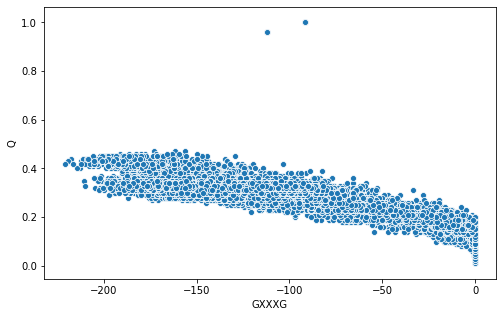

In [14]:
sns.scatterplot("GXXXG", "Q", data=a)

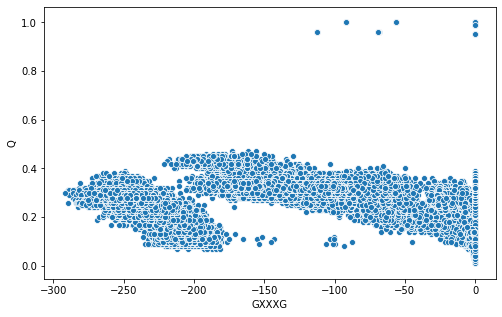

In [12]:
sns.scatterplot("GXXXG", "Q", data=a)

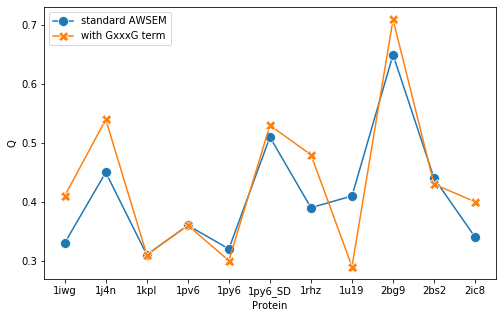

In [15]:
y = "Q"
d = data.query("Folder != 'run1_correct' and Folder != 'run2_cbd_gxxxg'and Protein != '2bl2' and Protein != '1occ' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
plt.legend(["standard AWSEM", "with GxxxG term"])

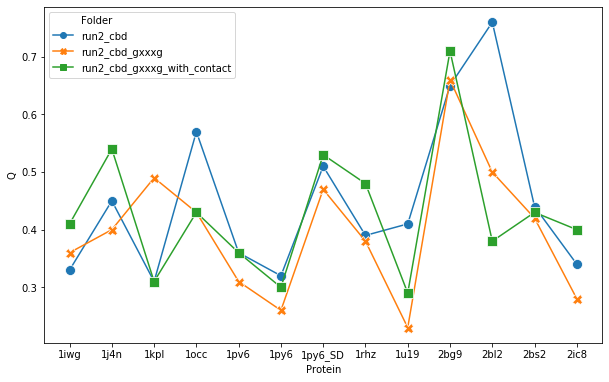

In [25]:
y = "Q"
d = data.query("Folder != 'run1_correct' and Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["original model", "CBD model"])

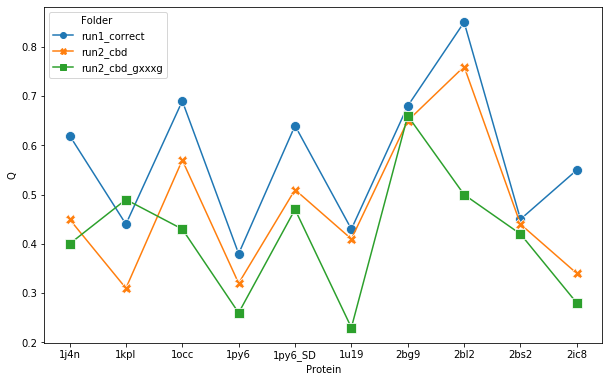

In [7]:
data = pd.read_csv("/Users/weilu/Research/data/openMM/membrane_protein_structure_prediction_run2_cbd_gxxxg_with_contact_07-10.csv")
data = data.reset_index(drop=True)
y = "Q"
d = data.query("Steps > 1000").reset_index(drop=True)
t = d.groupby(["Protein", "Folder"])[y].idxmax().reset_index()
max_Q_data = d.iloc[t[y].to_list()].reset_index(drop=True)
sub_data = max_Q_data
ax = sns.lineplot(x="Protein", y=y, markers=True, ms=10, style="Folder", hue="Folder", data=sub_data, dashes=False)
# _ = ax.set_xticklabels(labels=sub_label_list, rotation=0, ha='center')
# plt.legend(["original model", "CBD model"])

In [19]:
data.sort_values(["Folder", "Protein", "Fragment"]).groupby(["Folder", "Protein"]).head(1)

Unnamed: 0  Backbone  Beta  CBD_excl  Contact   ER          Folder  \
420420      420420    181.39   0.0      0.00  -126.43  0.0    run1_correct   
520520      520520    390.63   0.0      0.00  -287.07  0.0    run1_correct   
500500      500500    490.49   0.0      0.00  -211.96  0.0    run1_correct   
560560      560560    181.31   0.0      0.00  -255.63  0.0    run1_correct   
440440      440440     98.09   0.0      0.00  -122.76  0.0    run1_correct   
580580      580580    463.31   0.0      0.00  -363.00  0.0    run1_correct   
400400      400400    371.06   0.0      0.00   -74.76  0.0    run1_correct   
460460      460460    118.47   0.0      0.00  -211.49  0.0    run1_correct   
540540      540540    202.26   0.0      0.00  -237.95  0.0    run1_correct   
480480      480480    191.96   0.0      0.00  -254.35  0.0    run1_correct   
20021        20021     44.85   0.0      3.95  -150.13  0.0        run2_cbd   
120121      120121     64.85   0.0     12.35  -356.59  0.0        run2_cbd   
100101      100101     93.15   0.0     24.72  -263.51  0.0        run2_cbd   
160161      160161    104.73   0.0     16.44  -335.29  0.0        run2_cbd   
40041        40041     59.27   0.0      4.59  -161.79  0.0        run2_cbd   
180181      180181    138.35   0.0     28.86  -444.16  0.0        run2_cbd   
1                1     42.61   0.0      3.01   -96.65  0.0        run2_cbd   
60061        60061     48.29   0.0      9.59  -247.92  0.0        run2_cbd   
140141      140141    100.81   0.0     16.00  -301.57  0.0        run2_cbd   
80081        80081     94.78   0.0     26.04  -306.29  0.0        run2_cbd   
220221      220221     44.97   0.0      3.46     0.00  0.0  run2_cbd_gxxxg   
320321      320321     65.46   0.0     15.30     0.00  0.0  run2_cbd_gxxxg   
300301      300301     90.96   0.0     18.40     0.00  0.0  run2_cbd_gxxxg   
360361      360361    101.09   0.0     13.57     0.00  0.0  run2_cbd_gxxxg   
240241      240241     57.58   0.0      5.20     0.00  0.0  run2_cbd_gxxxg   
380381      380381    136.10   0.0     18.98     0.00  0.0  run2_cbd_gxxxg   
200201      200201     41.32   0.0      2.43     0.00  0.0  run2_cbd_gxxxg   
260261      260261     44.93   0.0      5.88     0.00  0.0  run2_cbd_gxxxg   
340341      340341     90.51   0.0      9.62     0.00  0.0  run2_cbd_gxxxg   
280281      280281     87.41   0.0     11.08     0.00  0.0  run2_cbd_gxxxg   

        Fragment   GXXXG  Helical  ...  Pap  Protein     Q     Rama     Rg  \
420420   -568.11     NaN      0.0  ...  0.0     1j4n  1.00  -541.72  16.88   
520520   -979.10     NaN      0.0  ...  0.0     1kpl  1.00 -1009.39  18.00   
500500   -945.73     NaN      0.0  ...  0.0     1occ  1.00 -1159.40  19.04   
560560  -1117.24     NaN      0.0  ...  0.0     1py6  1.00 -1470.31  17.77   
440440   -606.69     NaN      0.0  ...  0.0  1py6_SD  1.00  -811.63  15.50   
580580  -1423.89     NaN      0.0  ...  0.0     1u19  1.00 -1461.15  19.64   
400400   -464.56     NaN      0.0  ...  0.0     2bg9  1.00  -485.33  14.79   
460460   -680.66     NaN      0.0  ...  0.0     2bl2  1.00  -937.00  17.58   
540540  -1090.85     NaN      0.0  ...  0.0     2bs2  1.00 -1461.81  19.15   
480480   -879.16     NaN      0.0  ...  0.0     2ic8  1.00 -1021.79  15.79   
20021    -524.86    0.00      0.0  ...  0.0     1j4n  0.95  -795.28  17.13   
120121   -889.01    0.00      0.0  ...  0.0     1kpl  0.95 -1357.04  18.10   
100101   -818.66    0.00      0.0  ...  0.0     1occ  0.91 -1397.61  19.43   
160161   -994.37    0.00      0.0  ...  0.0     1py6  0.93 -1698.36  18.12   
40041    -542.44    0.00      0.0  ...  0.0  1py6_SD  0.95  -916.67  15.69   
180181  -1240.71    0.00      0.0  ...  0.0     1u19  0.94 -1915.57  19.91   
1        -408.04    0.00      0.0  ...  0.0     2bg9  0.94  -713.01  15.02   
60061    -635.84    0.00      0.0  ...  0.0     2bl2  0.97 -1106.95  17.66   
140141   -957.28    0.00      0.0  ...  0.0     2bs2  0.95 -1671.34  19.39   
80081    -746.92    0.00     

In [16]:
tiny.sort_values(["Folder", "Protein", "Q"])

Unnamed: 0  Backbone  Beta  CBD_excl  Contact   ER    Folder  Fragment  \
2           2    868.93   0.0     31.16   -70.35  0.0  run2_cbd   -105.92   
4           4    927.09   0.0     21.64   -67.65  0.0  run2_cbd   -136.76   
3           3    681.66   0.0     28.40   -67.69  0.0  run2_cbd   -128.61   
1           1     42.61   0.0      3.01   -96.65  0.0  run2_cbd   -408.04   
0           0    119.24   0.0     50.44   -74.76  0.0  run2_cbd   -403.34   

   GXXXG  Helical  ...  Pap  Protein     Q    Rama     Rg  Run  S_chain  \
2    0.0      0.0  ...  0.0     2bg9  0.07 -138.84  52.00    0   467.10   
4    0.0      0.0  ...  0.0     2bg9  0.08 -167.47  39.80    0   608.90   
3    0.0      0.0  ...  0.0     2bg9  0.09 -224.57  41.05    0   428.32   
1    0.0      0.0  ...  0.0     2bg9  0.94 -713.01  15.02    0  -101.27   
0    0.0      0.0  ...  0.0     2bg9  1.00 -485.33  14.79    0  9981.59   

   Steps   TBM_Q    Total  
2      2   14.45   538.59  
4      4   38.12   539.72  
3      3   41.63   246.96  
1      1    2.52 -1240.48  
0      0  179.04  -728.50  

[5 rows x 23 columns]

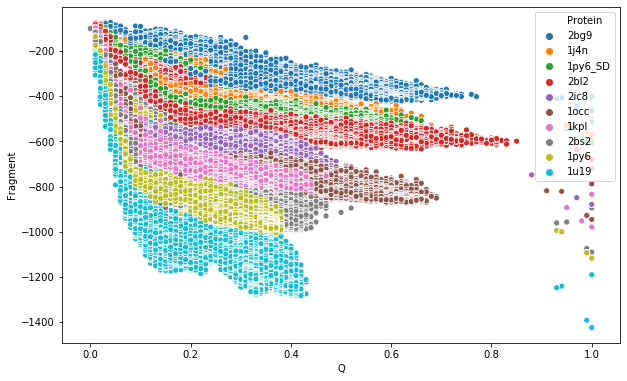

In [13]:
sns.scatterplot("Q", "Fragment", data=data, hue="Protein")

In [9]:
tiny = data.head().reset_index(drop=True)

In [10]:
tiny.columns

Index(['Unnamed: 0', 'Backbone', 'Beta', 'CBD_excl', 'Contact', 'ER', 'Folder',
       'Fragment', 'GXXXG', 'Helical', 'Helix_ori', 'Membrane', 'P_inside',
       'Pap', 'Protein', 'Q', 'Rama', 'Rg', 'Run', 'S_chain', 'Steps', 'TBM_Q',
       'Total'],
      dtype='object')

In [ ]:
data.col

In [25]:
# zimPosition to zimPositionSide
a = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/setups/1iwg/zimPosition")
b = []
for i in a:
    if i == 1:
        b.append("up")
    elif i == 2:
        b.append("middle")
    elif i == 3:
        b.append("down")
    else:
        print("error")
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/setups/1iwg/zimPositionSide"
with open(fileLocation, "w") as f:
    for i in b:
        f.write(f"{i}\n")